<h1>Project Goal</h1> Analyze the performance of two campaigns (control and test) based on the provided dataset. The primary objective is to determine which campaign delivers better results across key metrics.
<h1>Project Steps</h1> <h3>Preliminary Data Processing</h3>
Load and study the dataset structure.<br>
Handle any missing values if present.<br>
Standardize data formats (e.g., dates).<br>
Check for outliers and correct them.<br>
<h3>Calculation of Key Metrics</h3> For each campaign, calculate:<br>
Average and median expenditure (Spend).<br>
Average impressions (Impressions), unique impressions (Reach), and website clicks (Website Clicks).<br>
Calculate cost per purchase.<br>
Conversion rates for each stage:<br>
Conversion from impressions (Impressions) to website clicks (Website Clicks).<br>
Conversion from clicks to content views (View Content).<br>
Conversion from cart additions (Add to Cart) to purchases (Purchase).<br>
Conversion from website clicks to purchases.<br>
<h3>Comparative Analysis of Campaigns</h3>
Compare the results of the control and test campaigns across key metrics (e.g., cost per acquisition, conversion rate from website clicks to purchases).<br>
Identify strengths and weaknesses of each campaign.<br>
<h3>Statistical Testing</h3>
Conduct an appropriate test to determine the statistical significance of differences between the campaigns.<br>
Evaluate the p-value and decide if the differences are significant.<br>
<h3>Power Analysis</h3>
Verify if the data is sufficient to draw reliable conclusions.<br>
Assess whether the test duration was adequate.<br>
<h3>Data Visualization</h3>
Create charts to present results:<br>
Compare expenditures, impressions, clicks, and conversions.<br>
Visualize changes across funnel stages.<br>
<h1>Project Results</h1>
Conclusions about statistically significant differences between the campaigns.<br>
Recommendations for marketing strategy.<br>
<h3>Dataset Features:</h3>
Campaign Name: The name of the campaign.<br>
Date: The date of record.<br>
Spend: Amount spent on the campaign in dollars.<br>
Impressions: Number of ad impressions received during the campaign.<br>
Reach: Number of unique ad impressions.<br>
Website Clicks: Number of clicks on the website received via ads.<br>
Searches: Number of users who performed searches on the site.<br>
View Content: Number of users who viewed content and products on the site.<br>
Add to Cart: Number of users who added products to the cart.<br>
Purchase: Number of purchases.<br>

In [1415]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import zt_ind_solve_power

In [1417]:
control_df = pd.read_csv("control_group.csv")
test_df = pd.read_csv("test_group.csv")

In [1419]:
len(control_df) == len(test_df)

True

<h2>Data cleaning</h2>

In [1422]:
df = pd.concat([control_df, test_df], ignore_index=True)

In [1424]:
df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


Let's transform the date data into a standard format and create a variable to store the day of the week.

In [1427]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [1429]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day of week'] = df['Date'].dt.day_name()

Checking the Data for Missing Values

In [1432]:
df.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
Day of week            0
dtype: int64

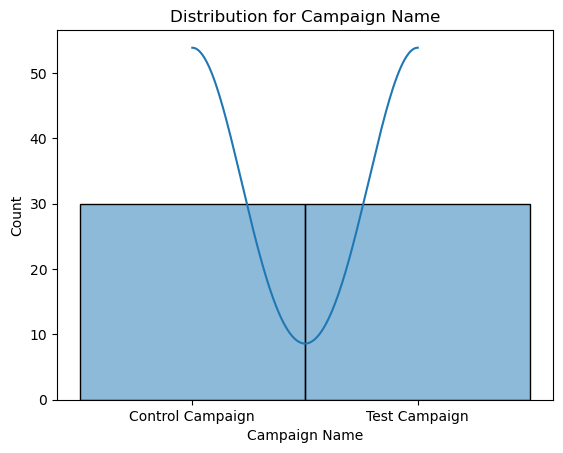

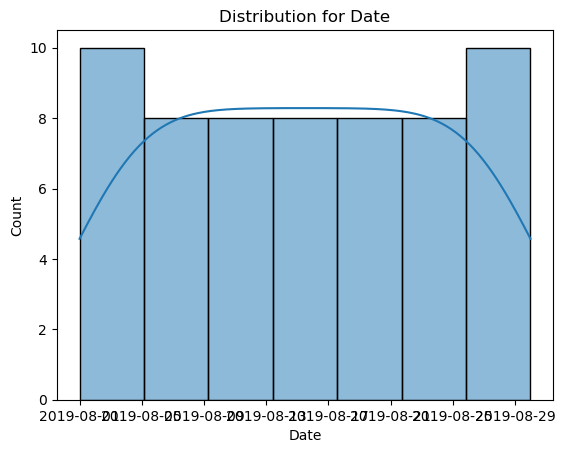

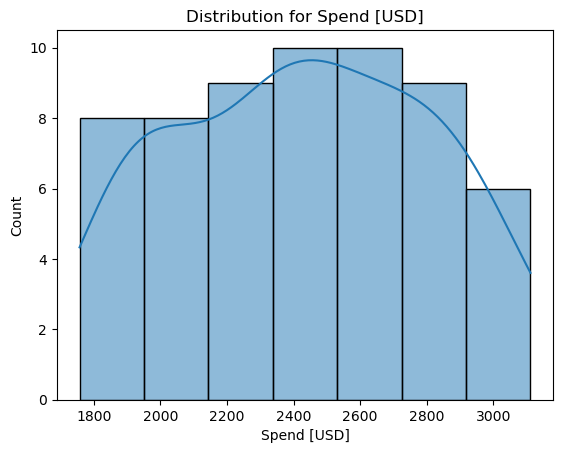

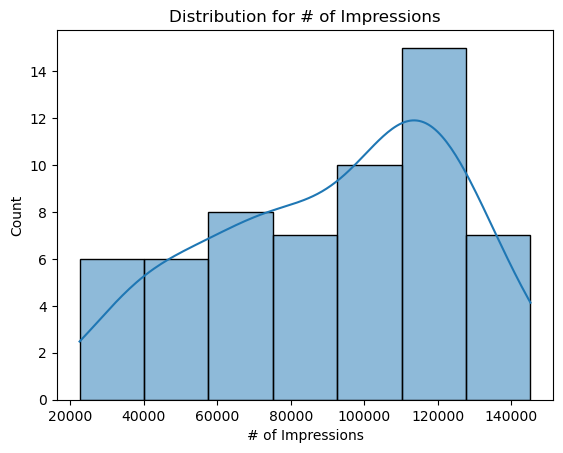

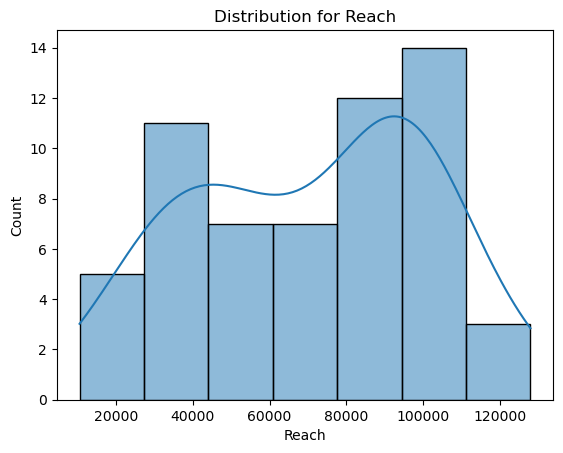

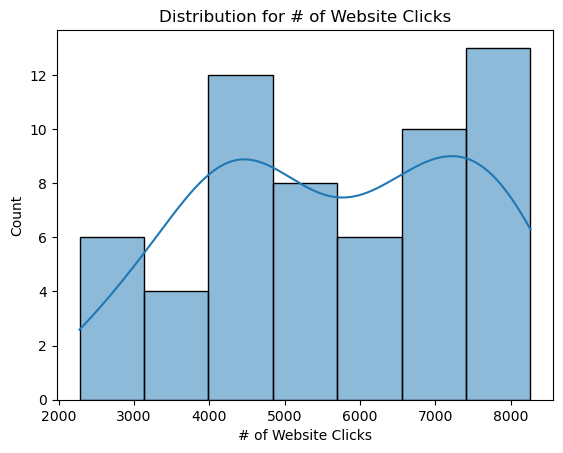

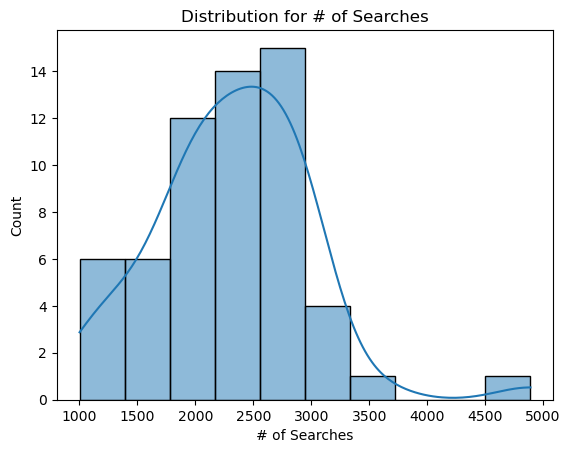

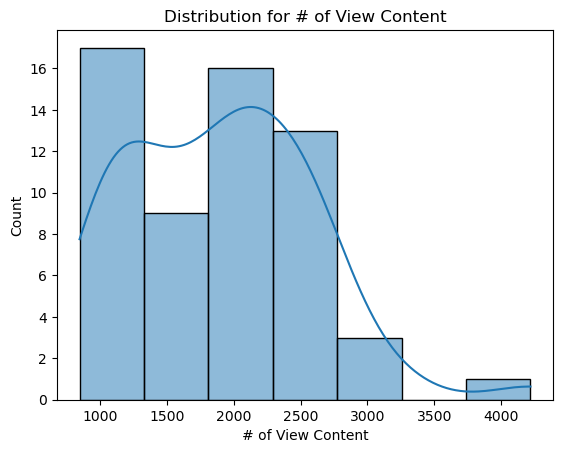

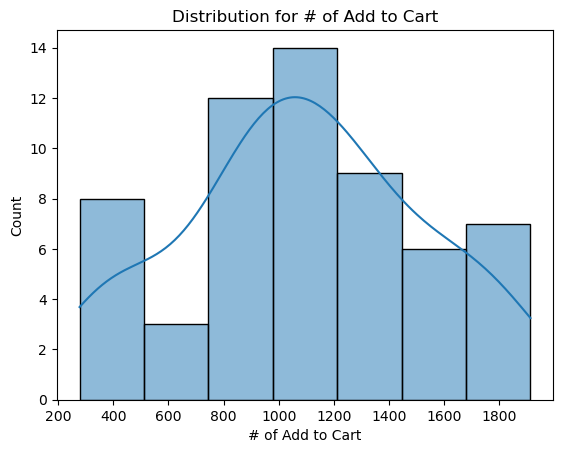

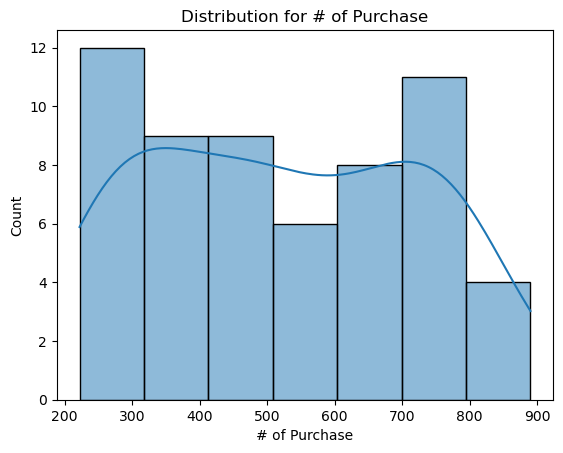

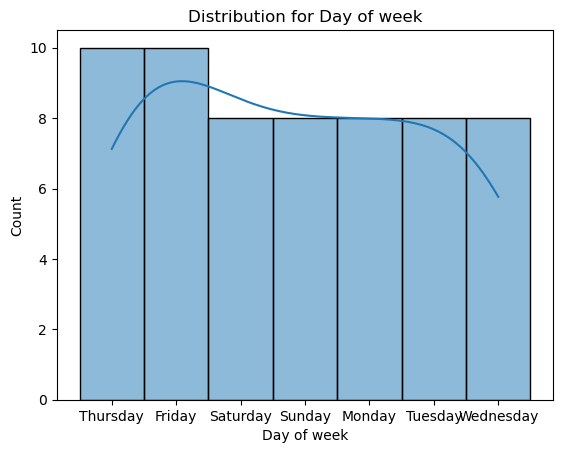

In [1434]:
for column in df.columns:
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution for {column}')
    plt.show()

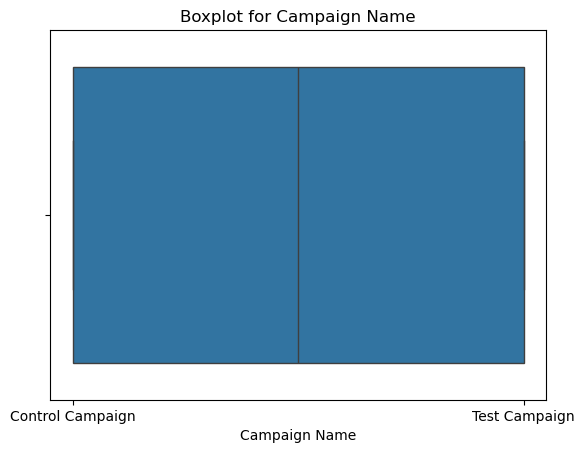

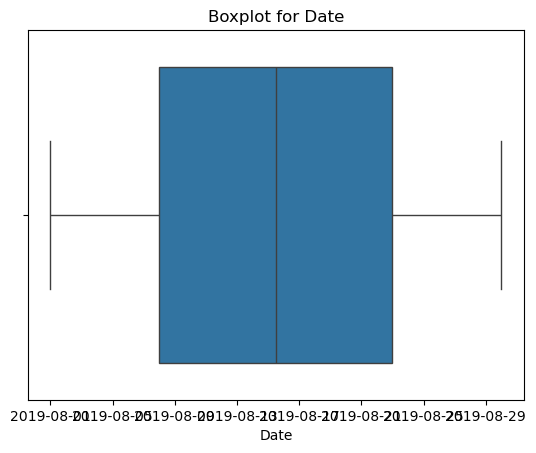

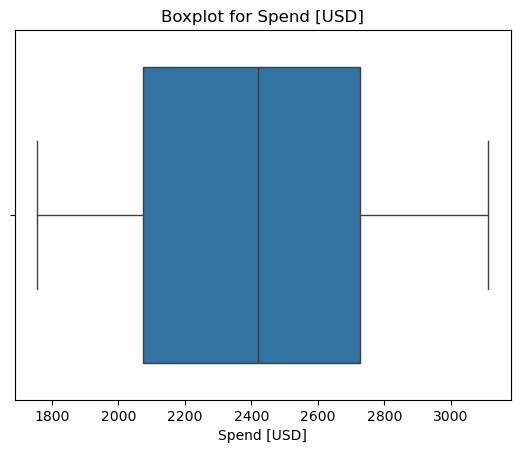

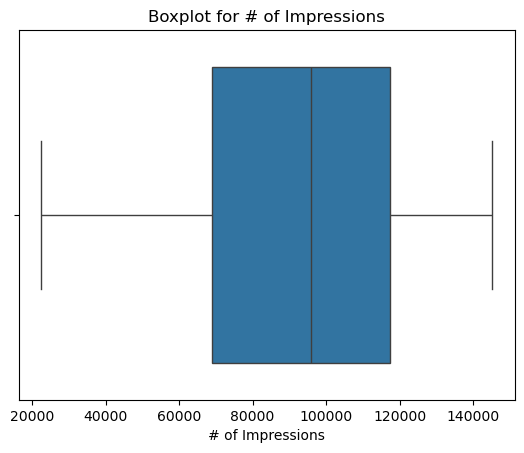

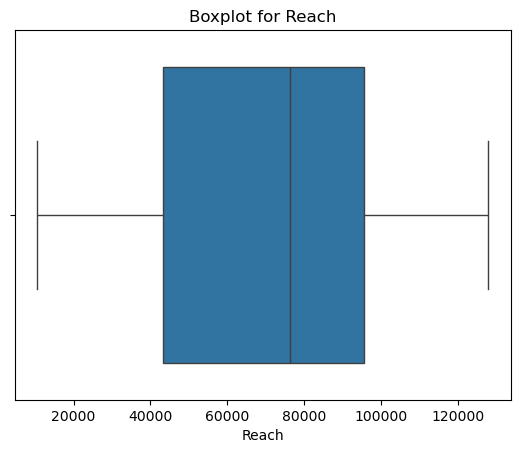

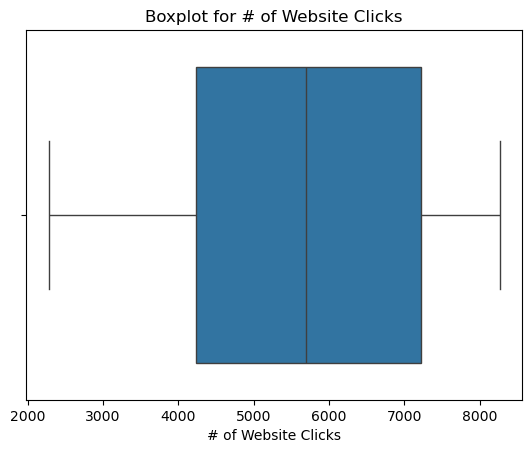

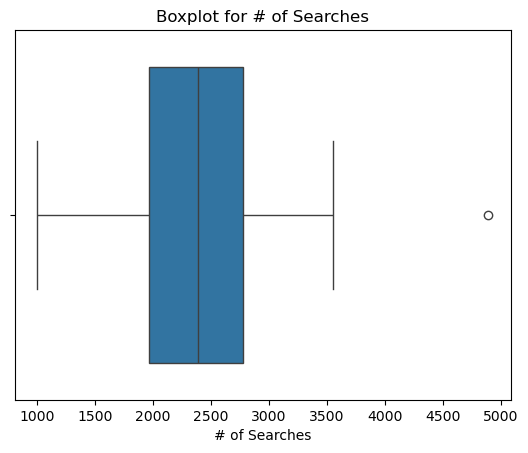

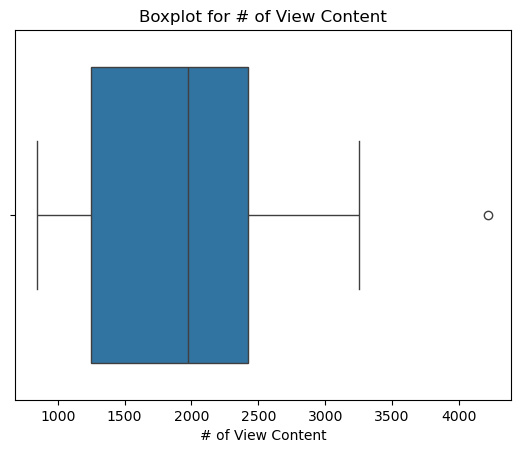

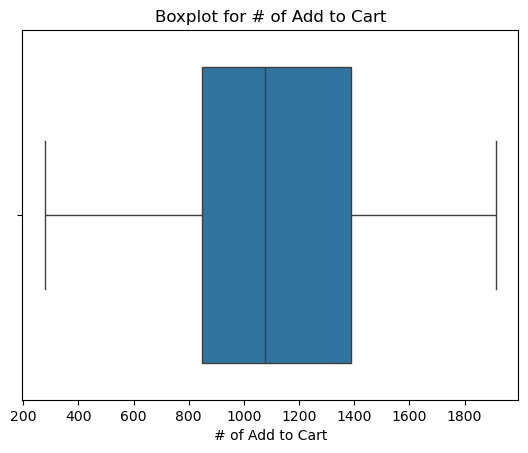

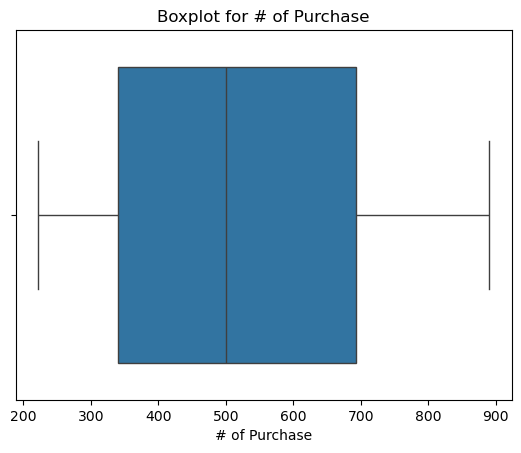

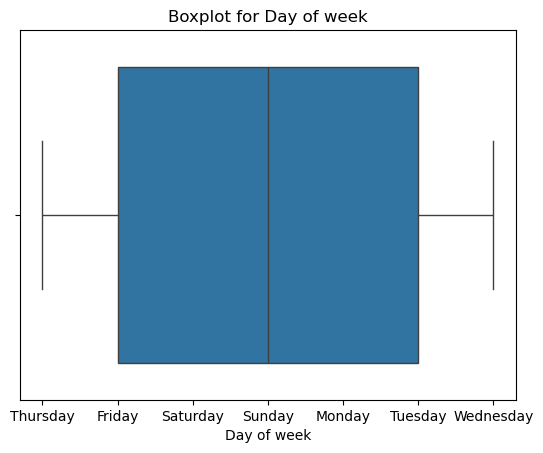

In [1435]:
columns = df.columns
for column in df.columns:
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [1436]:
df.interpolate(method='linear', inplace=True)

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_86333/2868764835.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [1437]:
df.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
Day of week            0
dtype: int64

Anomalously high numbers of users viewing products on the website, searching for products, clicking on the website, and adding products to the cart, combined with low conversion rates, no extra advertising funds, and a low number of unique ad impressions, could be caused by several factors:
Possible reasons for high values:
Natural surge of interest: The product may have gained unexpected attention (e.g., through a viral social media post, mention in the media, or customer reviews). This increase in exploration isn't tied to advertising budgets but results in higher user engagement with the product.
Returning user behavior: Loyal customers or users familiar with the brand may have suddenly become active (e.g., as a delayed response to previous ad campaigns).
Technical error or automated activity: Bots or automated systems could generate fake traffic, especially if the platform is vulnerable to such activity.
Competitive or research behavior from users: Users may browse the product to compare it with similar items but decide not to make a purchase.
Incorrect ad targeting: If the ads were shown to an irrelevant audience, they might lead to increased exploration of the site but fail to generate conversions.

To preserve the data but limit the impact of outliers, we will replace them with the upper allowable limit.

In [1440]:
searches_top_border = df['# of Searches'].quantile(0.95)
df['# of Searches'] = df['# of Searches'].apply(lambda x: x if x <= searches_top_border else searches_top_border)

view_top_border = df['# of View Content'].quantile(0.95)
df['# of View Content'] = df['# of View Content'].apply(lambda x: x if x <= view_top_border else view_top_border)

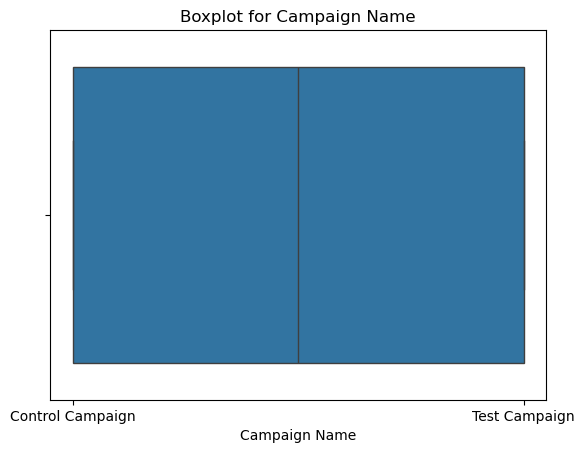

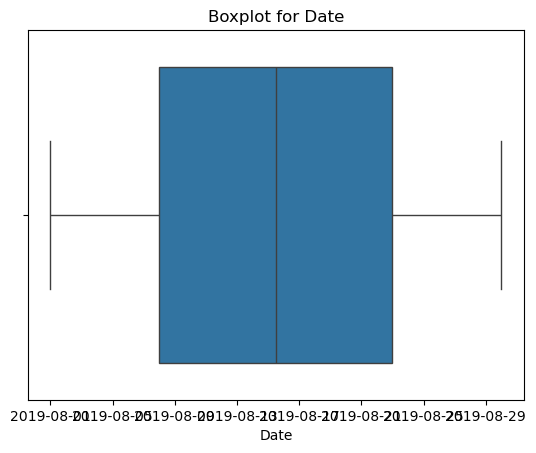

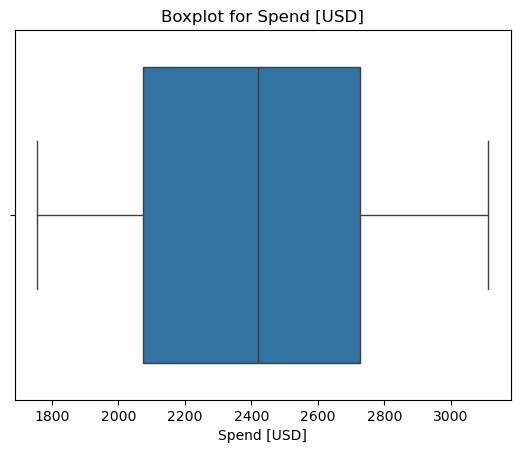

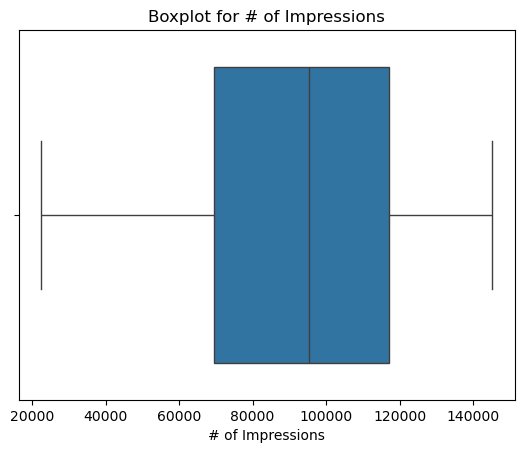

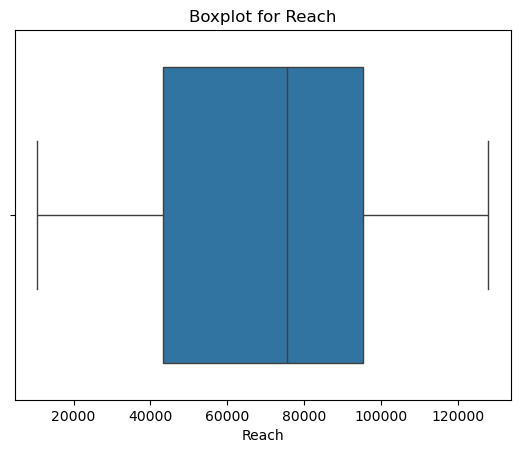

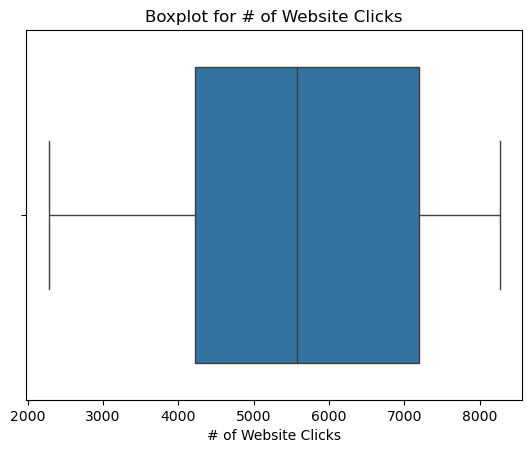

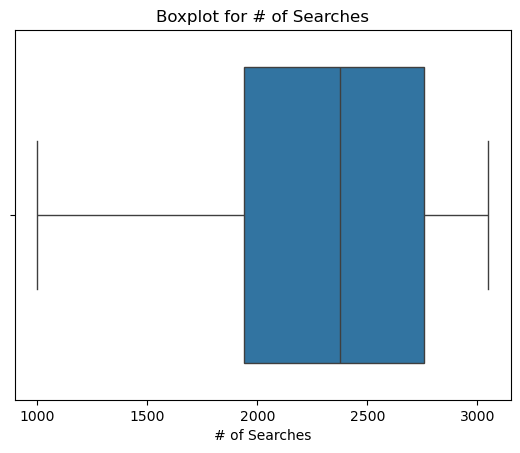

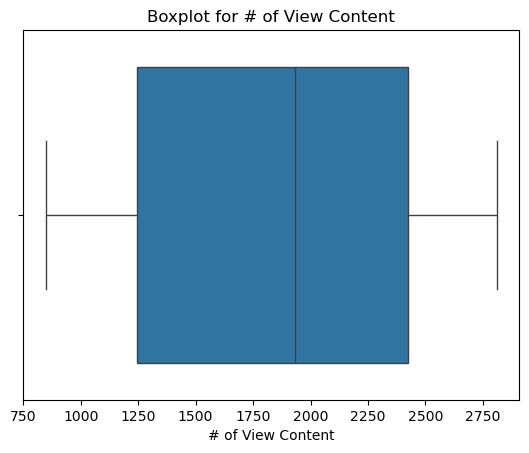

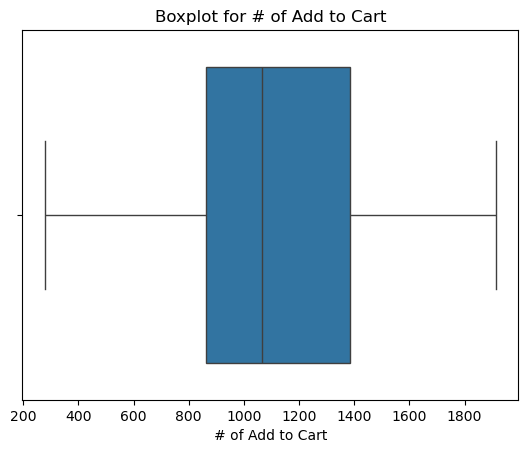

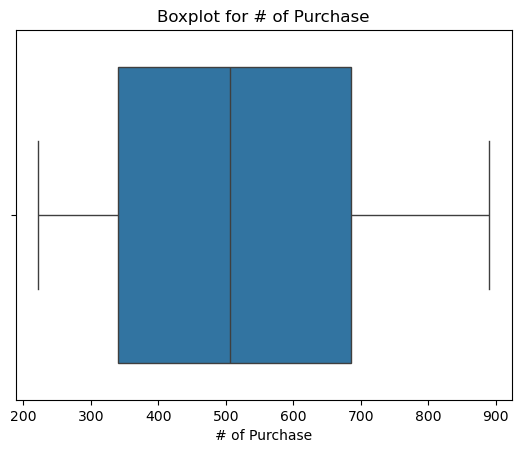

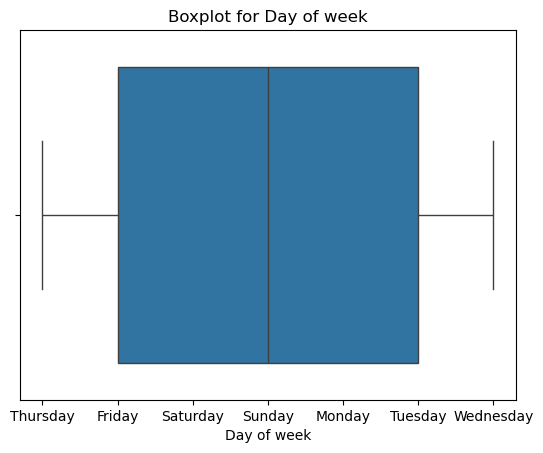

In [1441]:
columns = df.columns
for column in df.columns:
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [1443]:
control_campaign = df[df['Campaign Name'] == 'Control Campaign']
test_campaign = df[df['Campaign Name'] == 'Test Campaign']

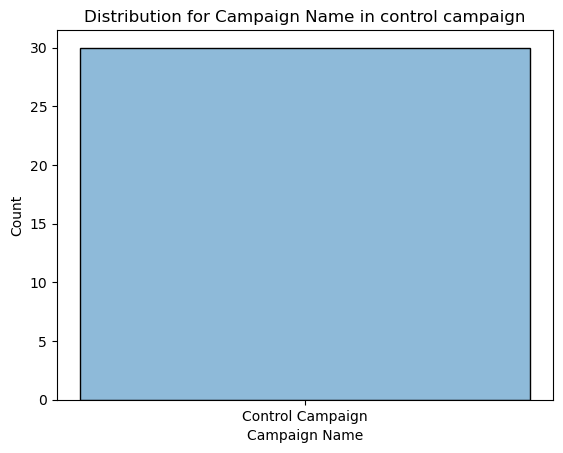

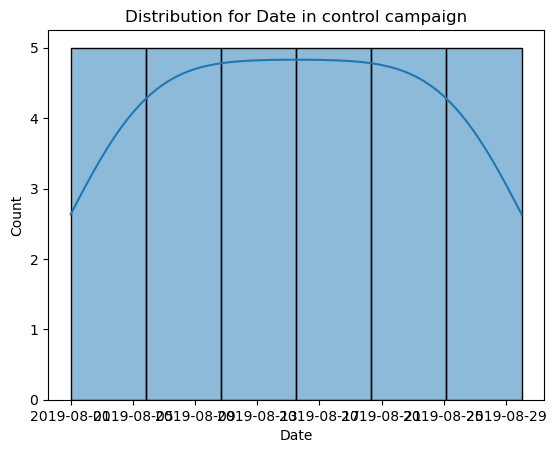

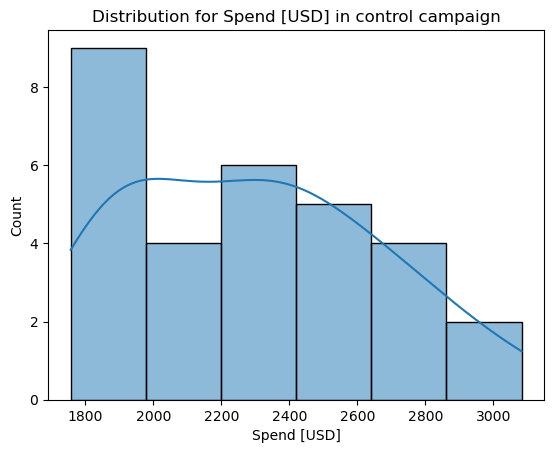

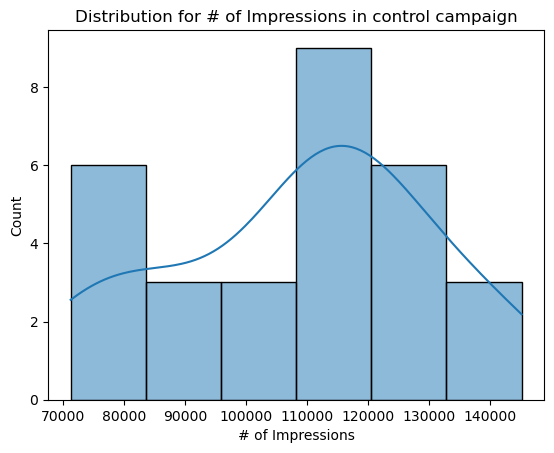

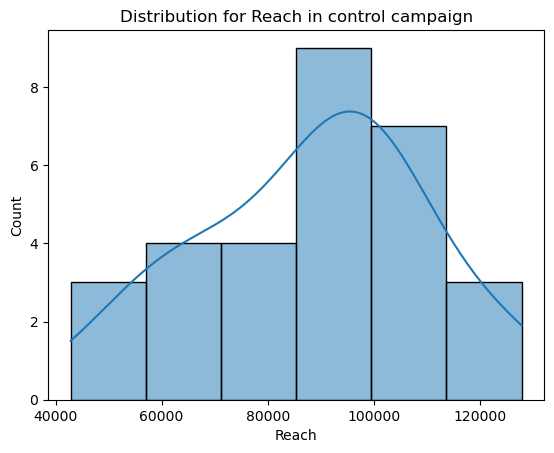

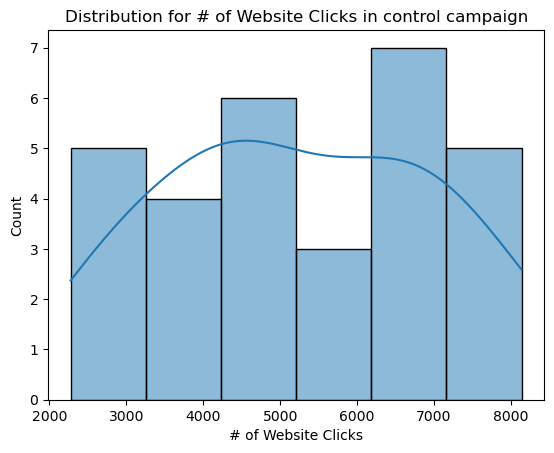

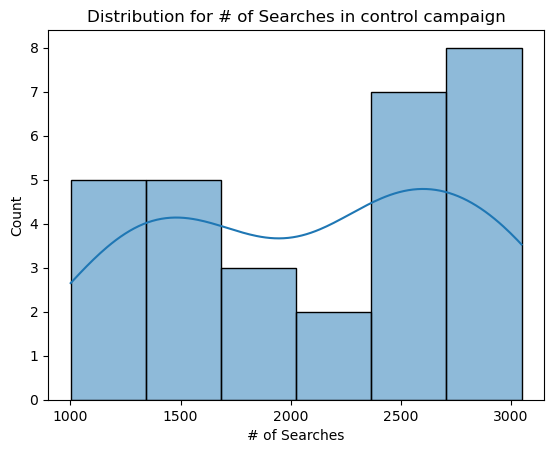

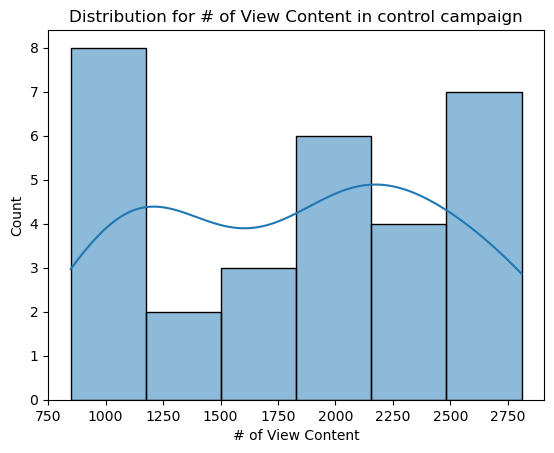

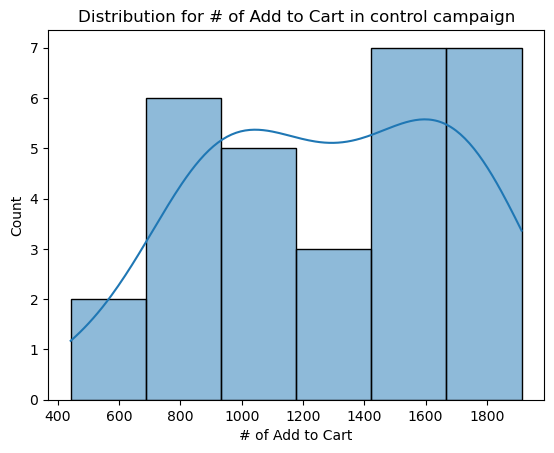

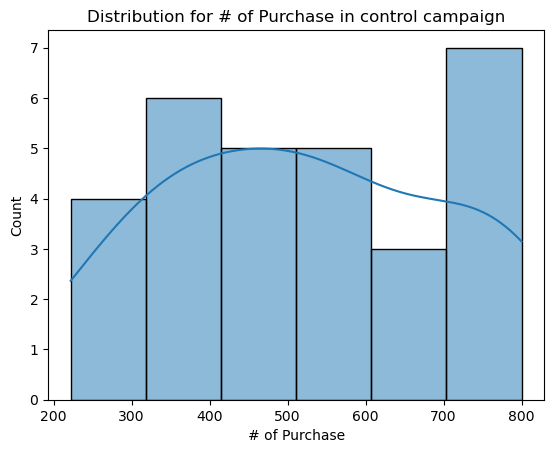

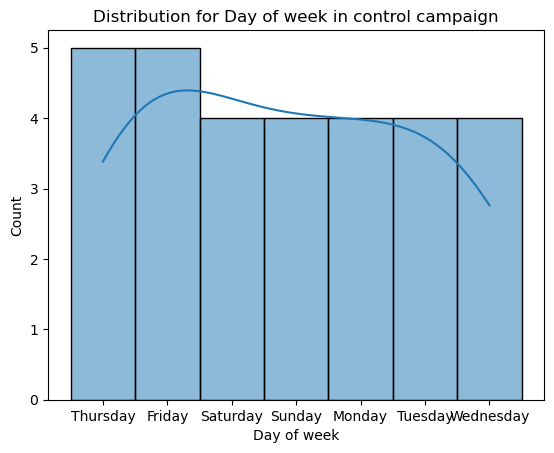

In [1444]:
for column in control_campaign.columns:
    sns.histplot(control_campaign[column].dropna(), kde=True)
    plt.title(f'Distribution for {column} in control campaign')
    plt.show()

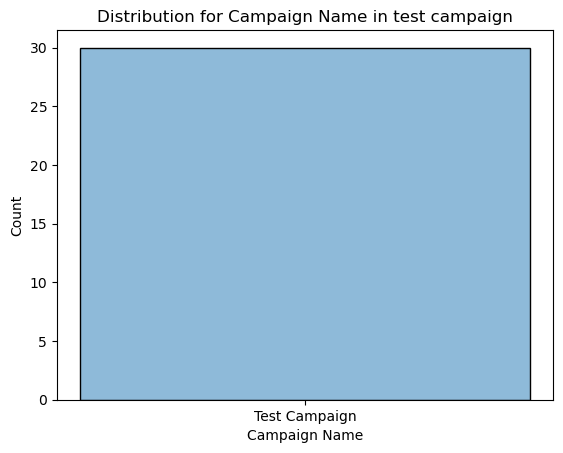

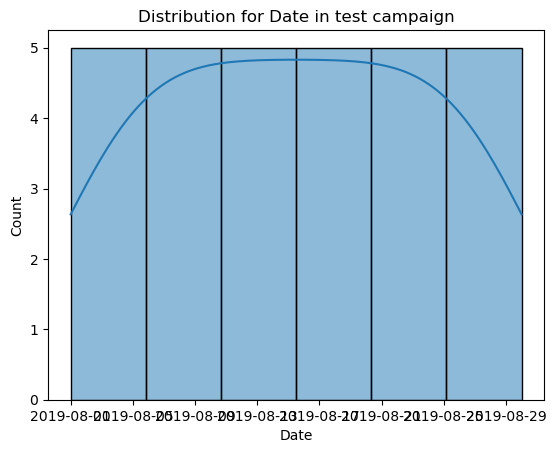

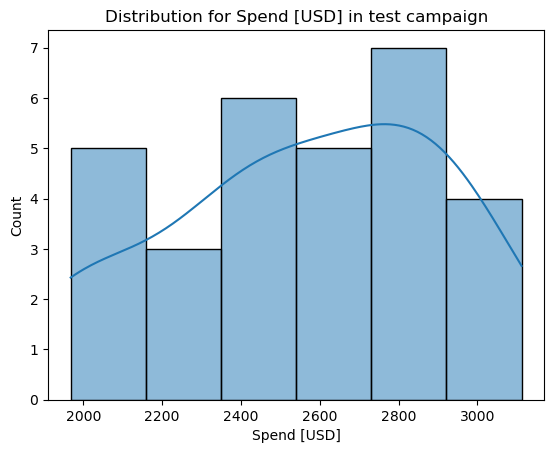

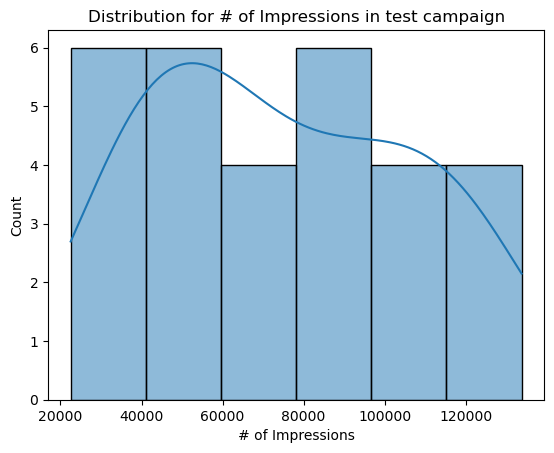

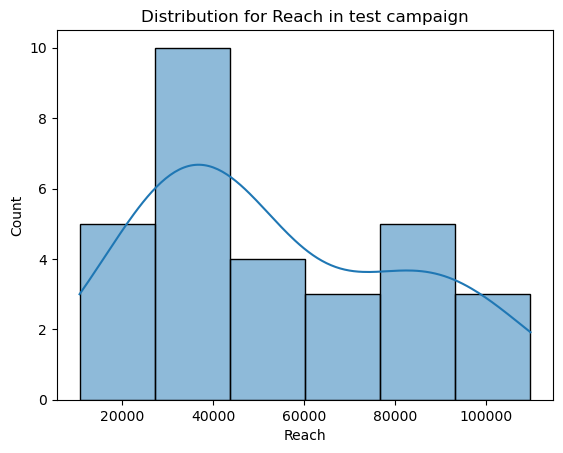

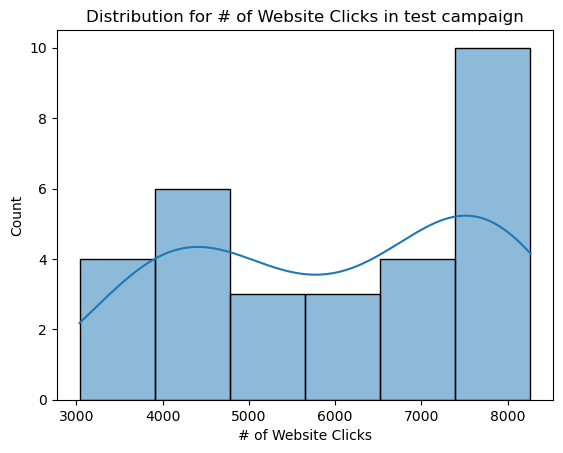

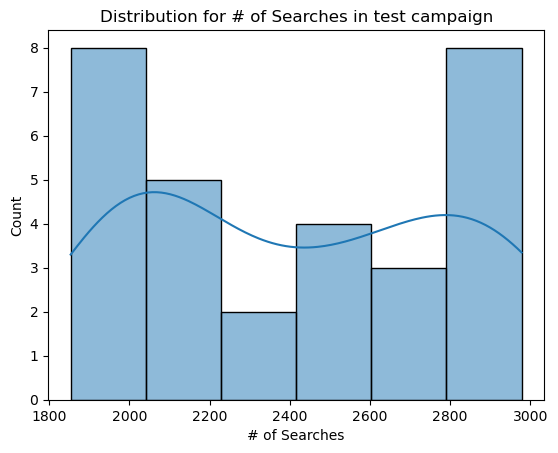

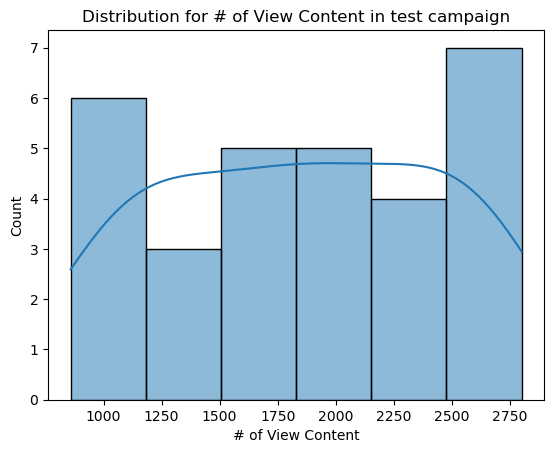

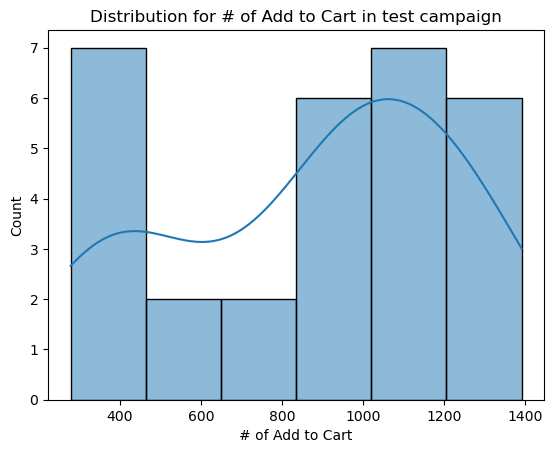

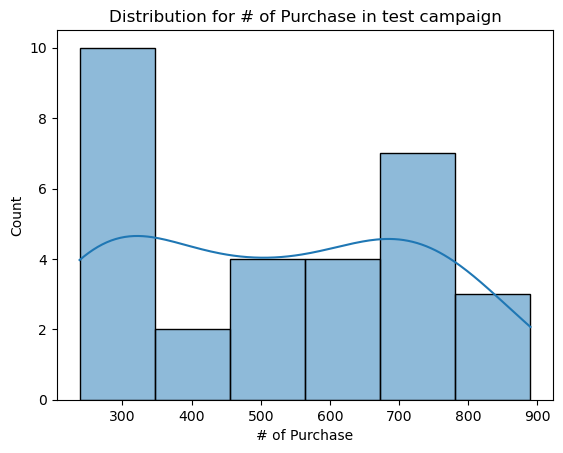

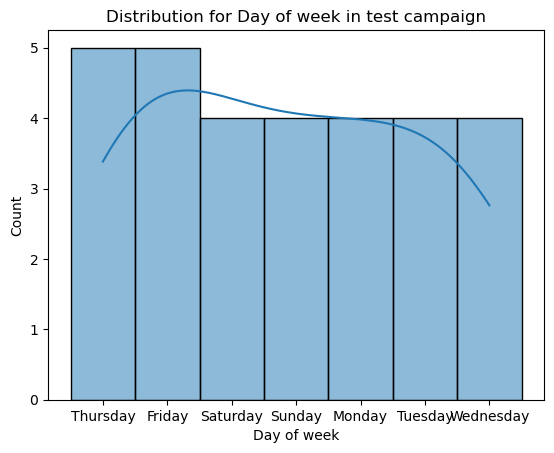

In [1445]:
for column in test_campaign.columns:
    sns.histplot(test_campaign[column].dropna(), kde=True)
    plt.title(f'Distribution for {column} in test campaign')
    plt.show()

<h2>Calculation and Visualization of Key Metrics</h2>

Average and Median Expenditure for Campaigns. Total Expenditure and Purchases for Campaigns. Cost Per Purchase

In [1452]:
campaigns_spend = df.groupby('Campaign Name')['Spend [USD]']
mean_spend = campaigns_spend.mean()
median_spend = campaigns_spend.median()
total_spend = df.groupby('Campaign Name')['Spend [USD]'].sum()
total_purchase = df.groupby('Campaign Name')['# of Purchase'].sum()
cost_per_purchase = total_spend / total_purchase

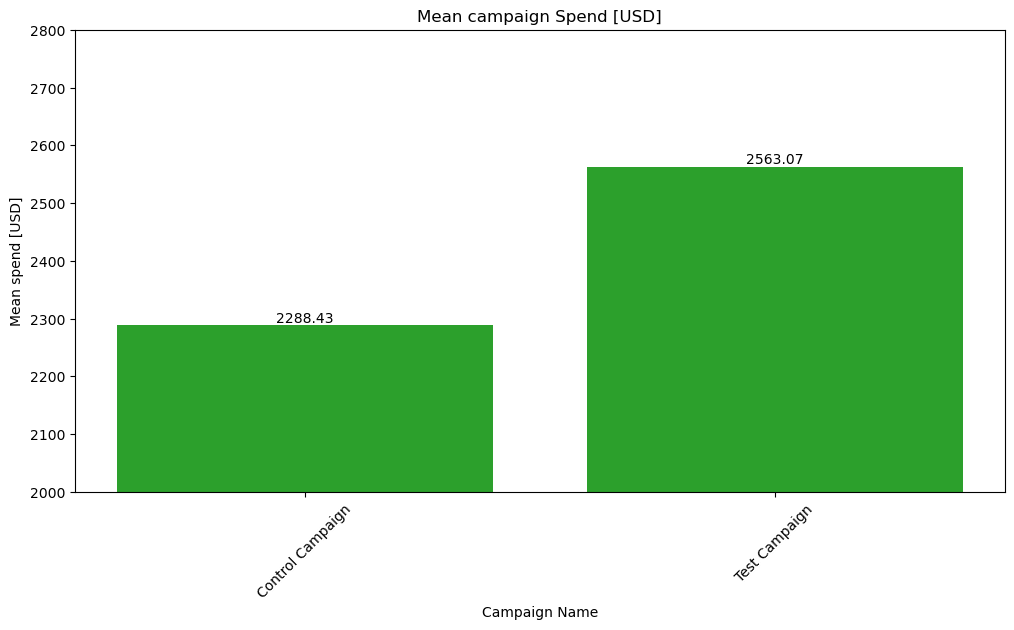

In [1455]:
campaign = mean_spend.index.tolist() 
spend = mean_spend.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, spend, color='#2ca02c')
plt.xlabel('Campaign Name')
plt.ylabel('Mean spend [USD]')
plt.title('Mean campaign Spend [USD]')
plt.xticks(rotation=45)
plt.ylim(2000, 2800)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

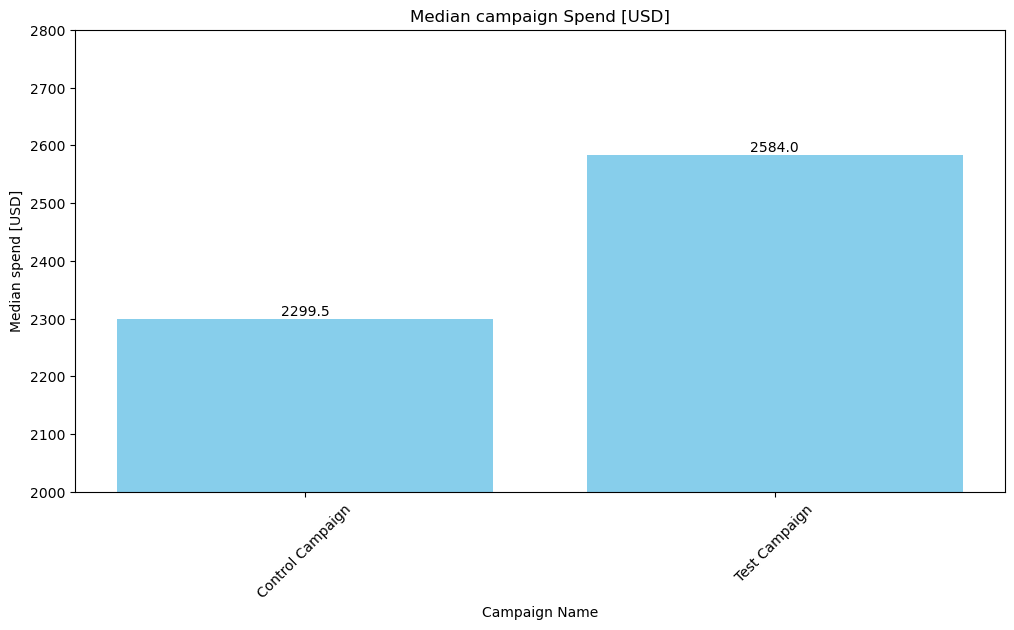

In [1456]:
campaign = median_spend.index.tolist() 
spend = median_spend.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, spend, color='skyblue')
plt.xlabel('Campaign Name')
plt.ylabel('Median spend [USD]')
plt.title('Median campaign Spend [USD]')
plt.xticks(rotation=45)
plt.ylim(2000, 2800)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

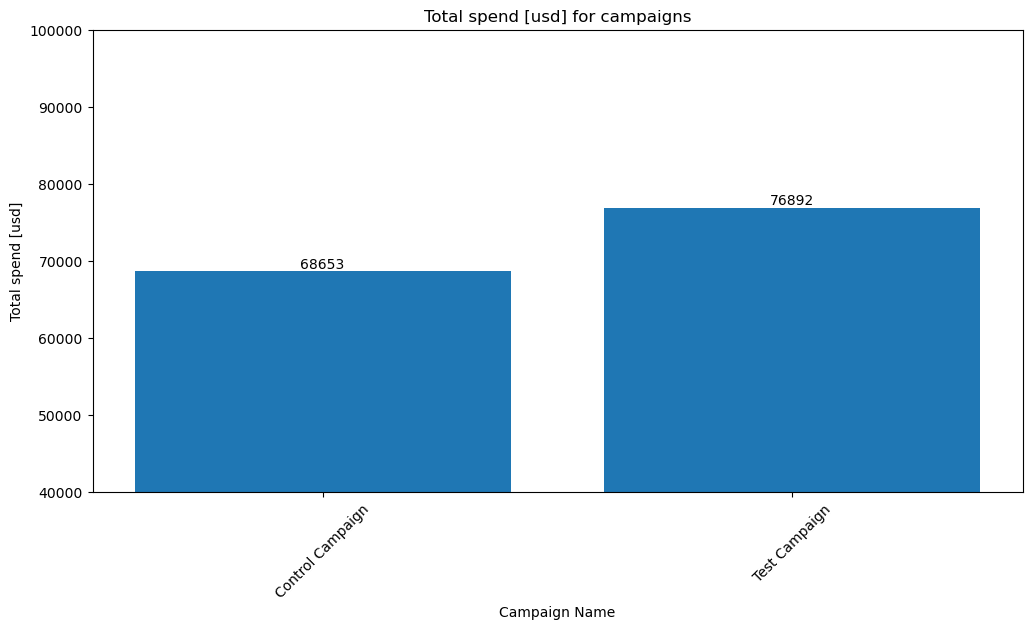

In [1457]:
campaign = total_spend.index.tolist() 
spend = total_spend.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, spend, color='#1f77b4')
plt.xlabel('Campaign Name')
plt.ylabel('Total spend [usd]')
plt.title('Total spend [usd] for campaigns')
plt.xticks(rotation=45)
plt.ylim(40000, 100000)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

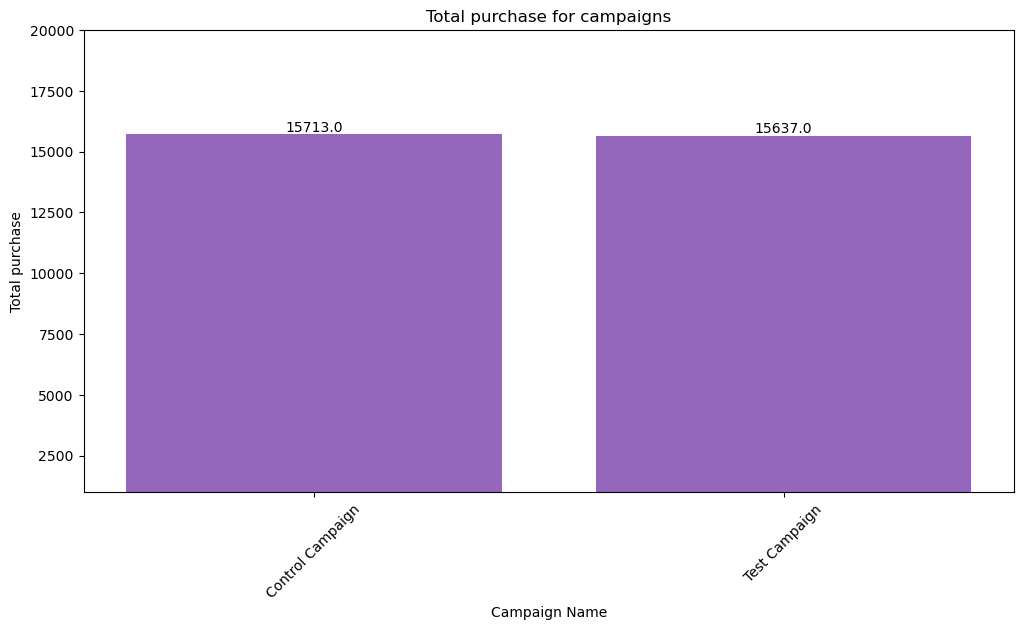

In [1458]:
campaign = total_purchase.index.tolist() 
purchase = total_purchase.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, purchase, color='#9467bd')
plt.xlabel('Campaign Name')
plt.ylabel('Total purchase')
plt.title('Total purchase for campaigns')
plt.xticks(rotation=45)
plt.ylim(1000, 20000)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

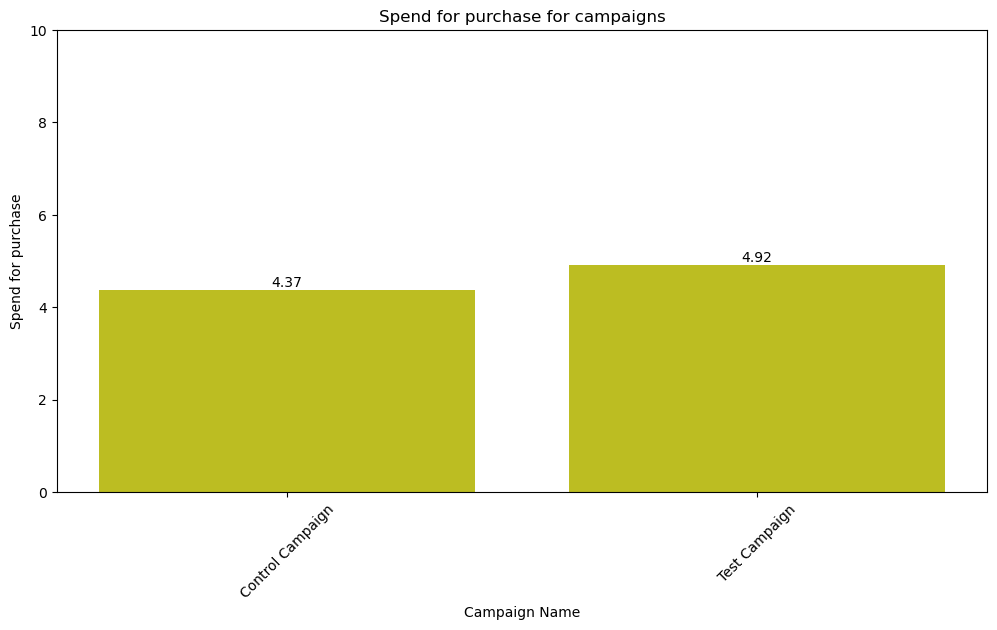

In [1459]:
campaign = cost_per_purchase.index.tolist() 
cost = cost_per_purchase.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, cost, color='#bcbd22')
plt.xlabel('Campaign Name')
plt.ylabel('Spend for purchase')
plt.title('Spend for purchase for campaigns')
plt.xticks(rotation=45)
plt.ylim(0, 10)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

Average Number of Impressions, Unique Impressions (Reach), and Website Clicks.

In [1461]:
average_impressions = df.groupby('Campaign Name')['# of Impressions'].mean()
average_reach = df.groupby('Campaign Name')['Reach'].mean()
average_website_clicks = df.groupby('Campaign Name')['# of Website Clicks'].mean()

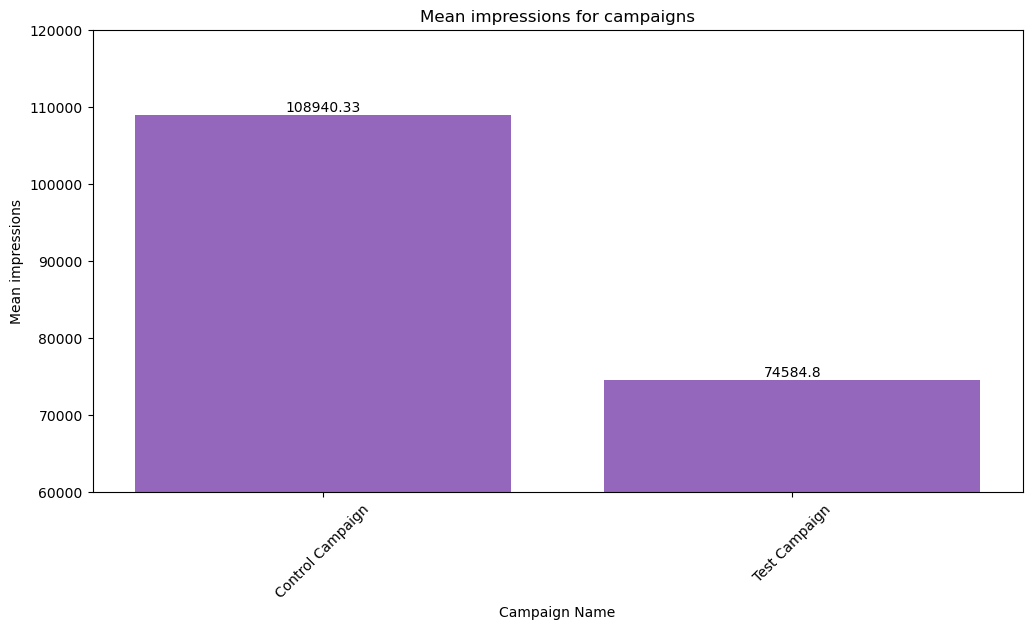

In [1463]:
campaign = average_impressions.index.tolist() 
impressions = average_impressions.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, impressions, color='#9467bd')
plt.xlabel('Campaign Name')
plt.ylabel('Mean impressions')
plt.title('Mean impressions for campaigns')
plt.xticks(rotation=45)
plt.ylim(60000, 120000)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

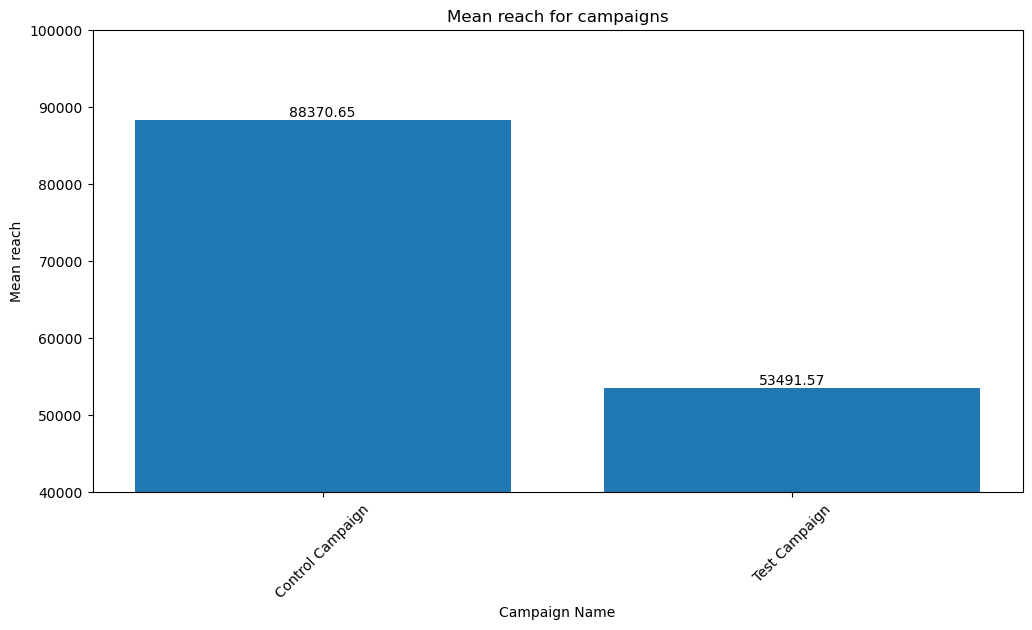

In [1464]:
campaign = average_reach.index.tolist() 
reach = average_reach.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, reach, color='#1f77b4')
plt.xlabel('Campaign Name')
plt.ylabel('Mean reach')
plt.title('Mean reach for campaigns')
plt.xticks(rotation=45)
plt.ylim(40000, 100000)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

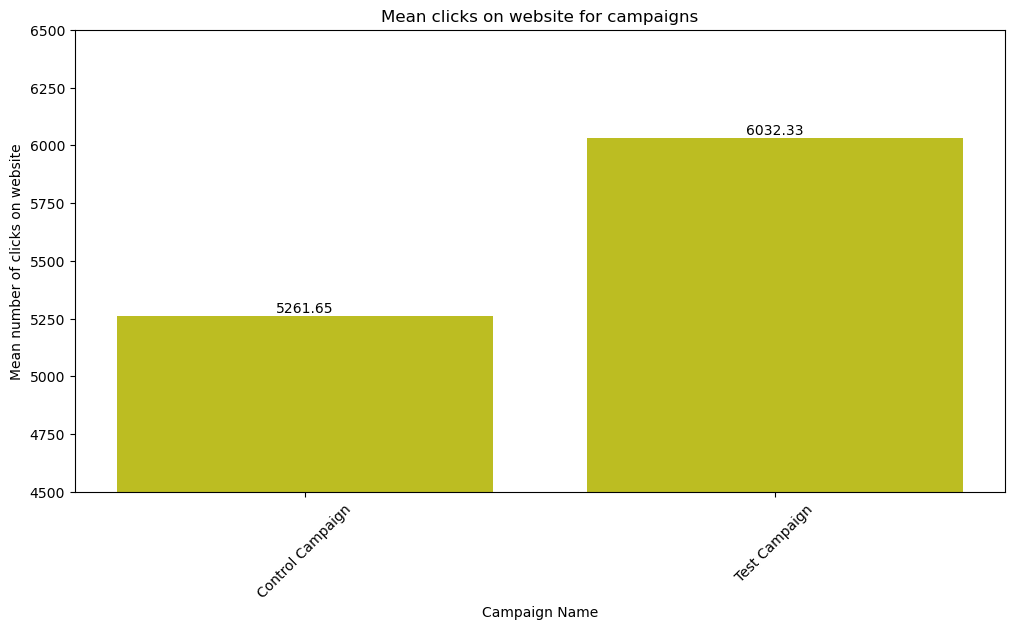

In [1465]:
campaign = average_website_clicks.index.tolist() 
clicks = average_website_clicks.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, clicks, color='#bcbd22')
plt.xlabel('Campaign Name')
plt.ylabel('Mean number of clicks on website')
plt.title('Mean clicks on website for campaigns')
plt.xticks(rotation=45)
plt.ylim(4500, 6500)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

Conversion Assessment

In [1467]:
df['Conversion Rate From clicks(%)'] = (df['# of Purchase'] / df['# of Website Clicks']) * 100
result = df.groupby('Campaign Name')['Conversion Rate From clicks(%)'].mean()

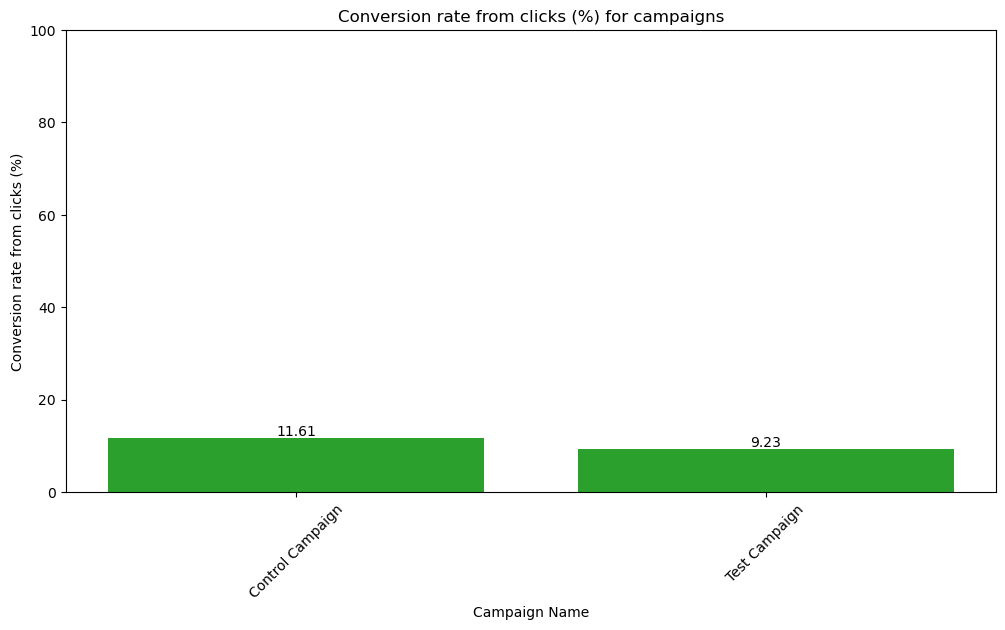

In [1468]:
campaign = result.index.tolist() 
rate = result.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, rate, color='#2ca02c')
plt.xlabel('Campaign Name')
plt.ylabel('Conversion rate from clicks (%)')
plt.title('Conversion rate from clicks (%) for campaigns')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [1471]:
df['Conversion Rate From views(%)'] = (df['# of Purchase'] / df['# of View Content']) * 100
result = df.groupby('Campaign Name')['Conversion Rate From views(%)'].mean()

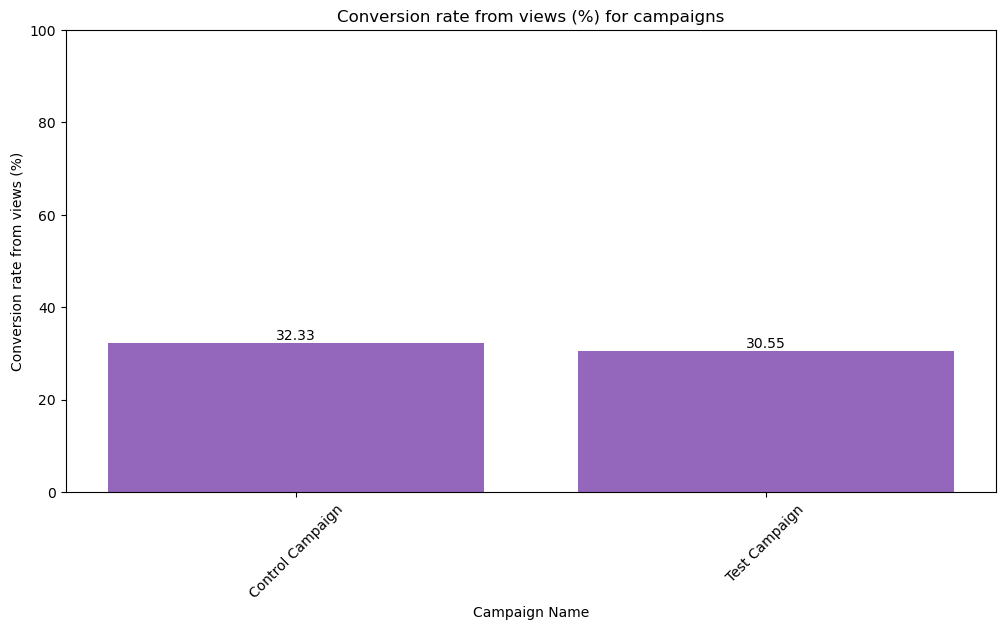

In [1475]:
campaign = result.index.tolist() 
rate = result.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, rate, color='#9467bd')
plt.xlabel('Campaign Name')
plt.ylabel('Conversion rate from views (%)')
plt.title('Conversion rate from views (%) for campaigns')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

Conversion Funnel

In [1487]:
df['Website clicks Rate From Impressions(%)'] = (df['# of Website Clicks'] / df['# of Impressions']) * 100
result = df.groupby('Campaign Name')['Website clicks Rate From Impressions(%)'].mean()

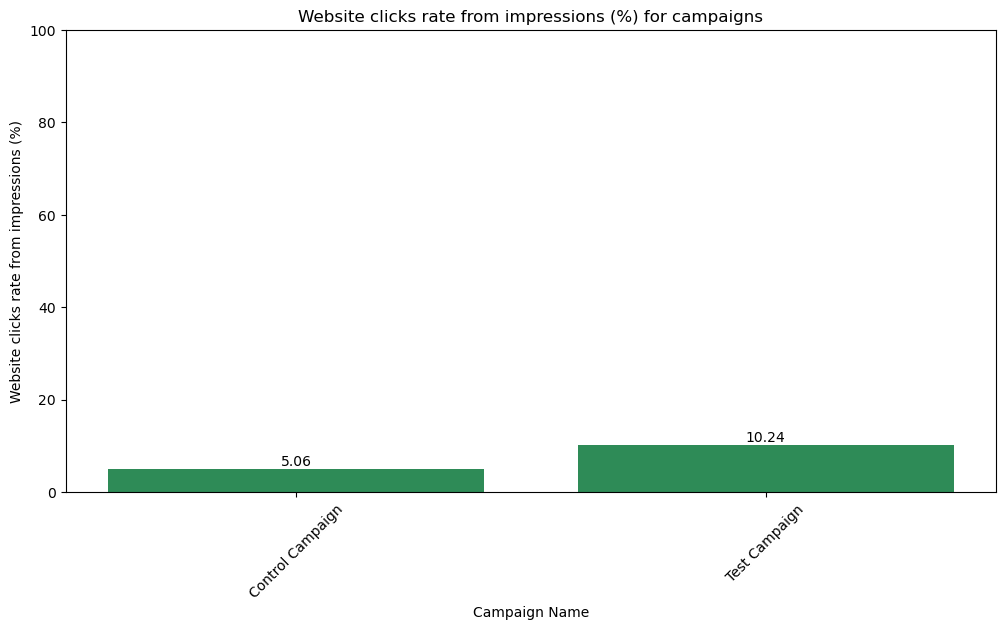

In [1489]:
campaign = result.index.tolist() 
rate = result.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, rate, color='#2E8B57')
plt.xlabel('Campaign Name')
plt.ylabel('Website clicks rate from impressions (%)')
plt.title('Website clicks rate from impressions (%) for campaigns')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [1491]:
df['Searches Rate From Website clicks(%)'] = (df['# of Searches'] / df['# of Website Clicks']) * 100
result = df.groupby('Campaign Name')['Searches Rate From Website clicks(%)'].mean()

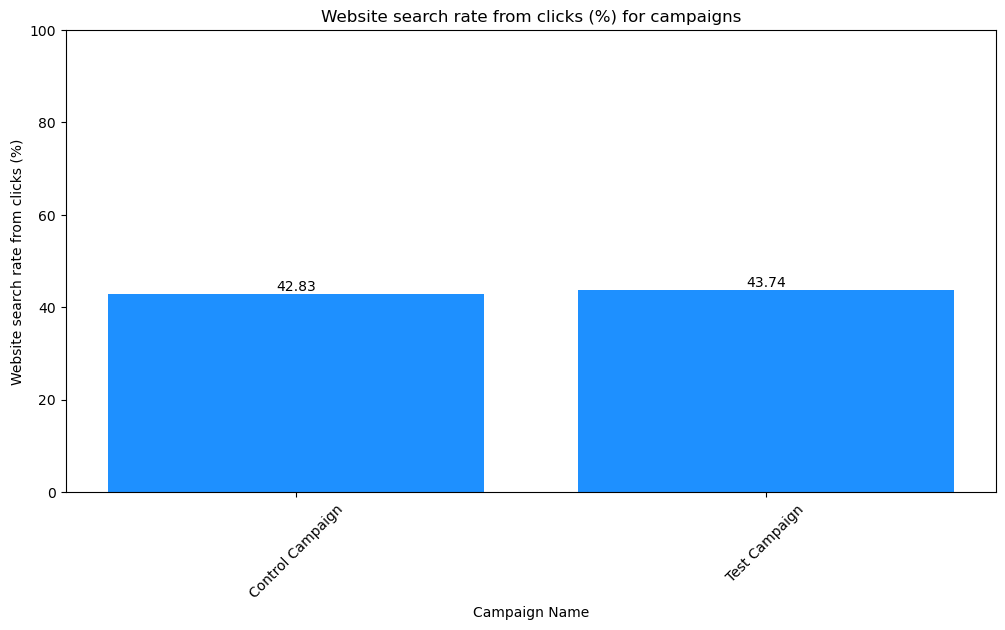

In [1493]:
campaign = result.index.tolist() 
rate = result.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, rate, color='#1E90FF')
plt.xlabel('Campaign Name')
plt.ylabel('Website search rate from clicks (%)')
plt.title('Website search rate from clicks (%) for campaigns')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [1495]:
df['Views Rate From Searches(%)'] = (df['# of View Content'] / df['# of Searches']) * 100
result = df.groupby('Campaign Name')['Views Rate From Searches(%)'].mean()

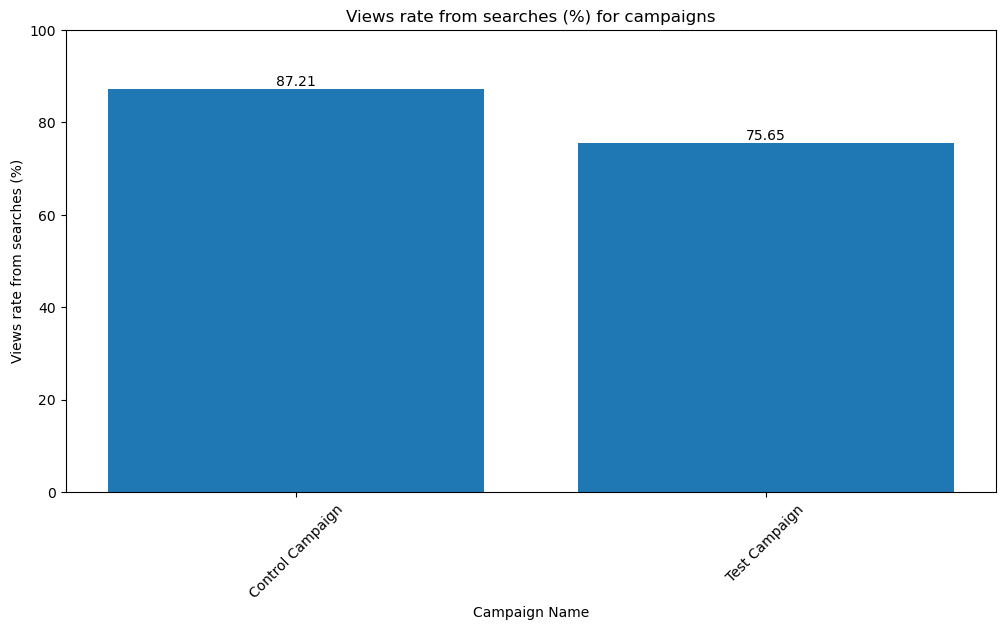

In [1497]:
campaign = result.index.tolist() 
rate = result.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, rate, color='#1f77b4')
plt.xlabel('Campaign Name')
plt.ylabel('Views rate from searches (%)')
plt.title('Views rate from searches (%) for campaigns')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [1499]:
df['Add to cart Rate From views(%)'] = (df['# of Add to Cart'] / df['# of View Content']) * 100 
result = df.groupby('Campaign Name')['Add to cart Rate From views(%)'].mean()

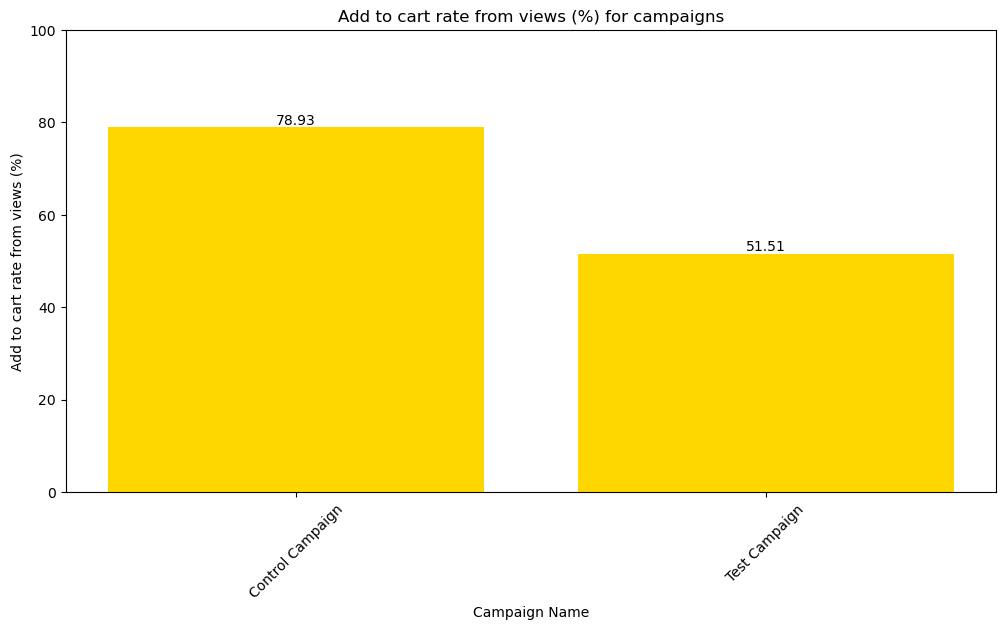

In [1501]:
campaign = result.index.tolist() 
rate = result.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, rate, color='#FFD700')
plt.xlabel('Campaign Name')
plt.ylabel('Add to cart rate from views (%)')
plt.title('Add to cart rate from views (%) for campaigns')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [1503]:
df['Purchase Rate From Add to Cart(%)'] = (df['# of Purchase'] / df['# of Add to Cart']) * 100
result = df.groupby('Campaign Name')['Purchase Rate From Add to Cart(%)'].mean()

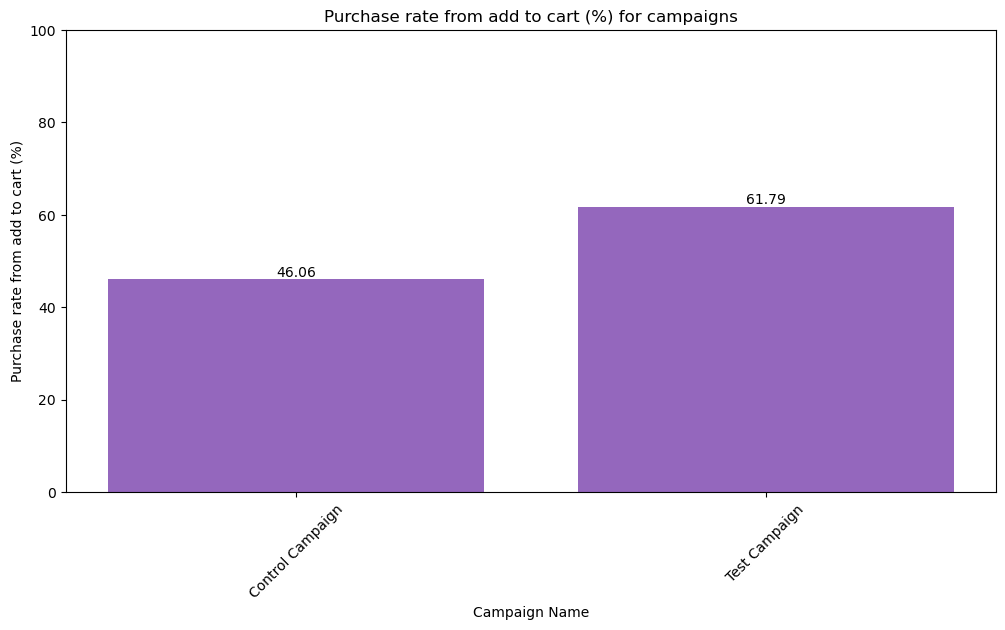

In [1505]:
campaign = result.index.tolist() 
rate = result.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign, rate, color='#9467bd')
plt.xlabel('Campaign Name')
plt.ylabel('Purchase rate from add to cart (%)')
plt.title('Purchase rate from add to cart (%) for campaigns')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

<h2>Data Distribution Over Time</h2>

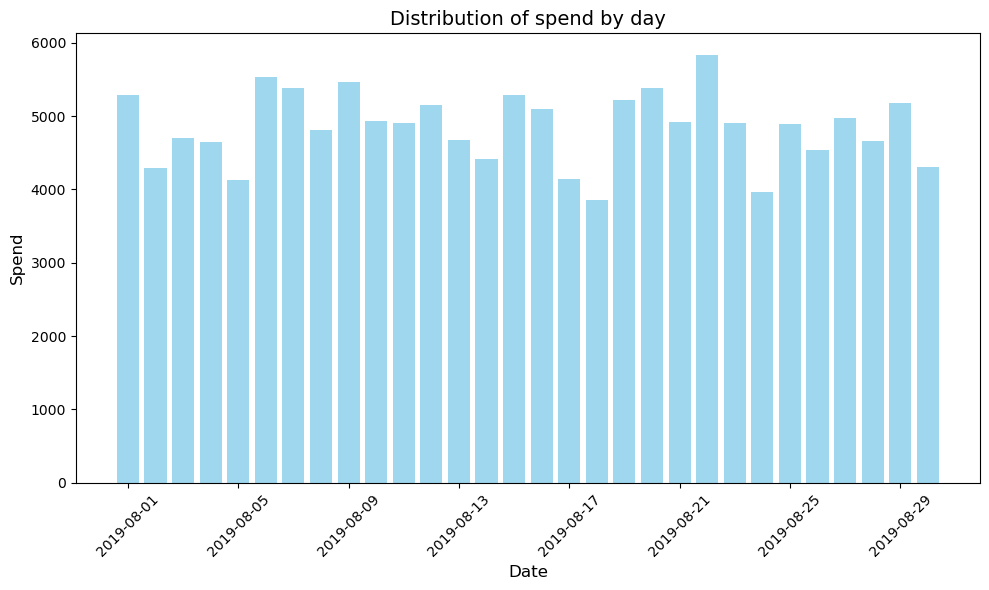

In [1508]:
daily_spend = df.groupby('Date')['Spend [USD]'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daily_spend.index, daily_spend.values, color='skyblue', alpha=0.8)

plt.title('Distribution of spend by day', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Spend', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [1510]:
mean = daily_purchases.mean()
std_dev = daily_purchases.std()

z_score_list = []
for conversion in daily_purchases:
    z_score = (conversion - mean) / std_dev
    z_score_list.append(z_score)

z_score_series = pd.Series(z_score_list)

indexes = z_score_series[(z_score_series > 2) | (z_score_series < -2)].index
indexes

Index([], dtype='int64')

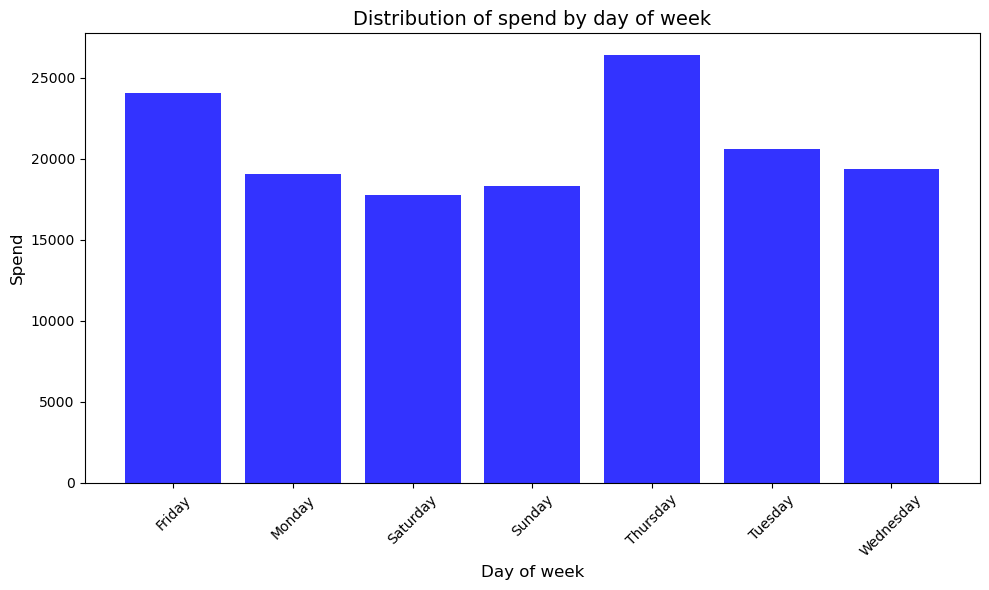

In [1568]:
daily_spend = df.groupby('Day of week')['Spend [USD]'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daily_spend.index, daily_spend.values, color='blue', alpha=0.8)

plt.title('Distribution of spend by day of week', fontsize=14)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Spend', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [1570]:
mean = daily_purchases.mean()
std_dev = daily_purchases.std()

z_score_list = []
for conversion in daily_purchases:
    z_score = (conversion - mean) / std_dev
    z_score_list.append(z_score)

z_score_series = pd.Series(z_score_list)

indexes = z_score_series[(z_score_series > 2) | (z_score_series < -2)].index
indexes

Index([], dtype='int64')

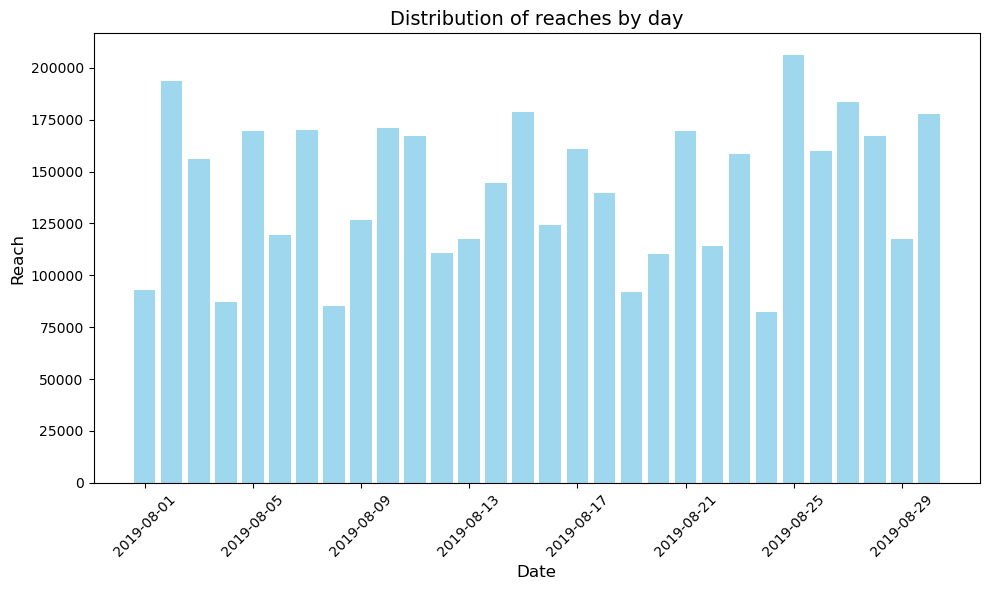

In [1572]:
daily_reaches = df.groupby('Date')['Reach'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daily_reaches.index, daily_reaches.values, color='skyblue', alpha=0.8)

plt.title('Distribution of reaches by day', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Reach', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [1574]:
mean = daily_purchases.mean()
std_dev = daily_purchases.std()

z_score_list = []
for conversion in daily_purchases:
    z_score = (conversion - mean) / std_dev
    z_score_list.append(z_score)

z_score_series = pd.Series(z_score_list)

indexes = z_score_series[(z_score_series > 2) | (z_score_series < -2)].index
indexes

Index([], dtype='int64')

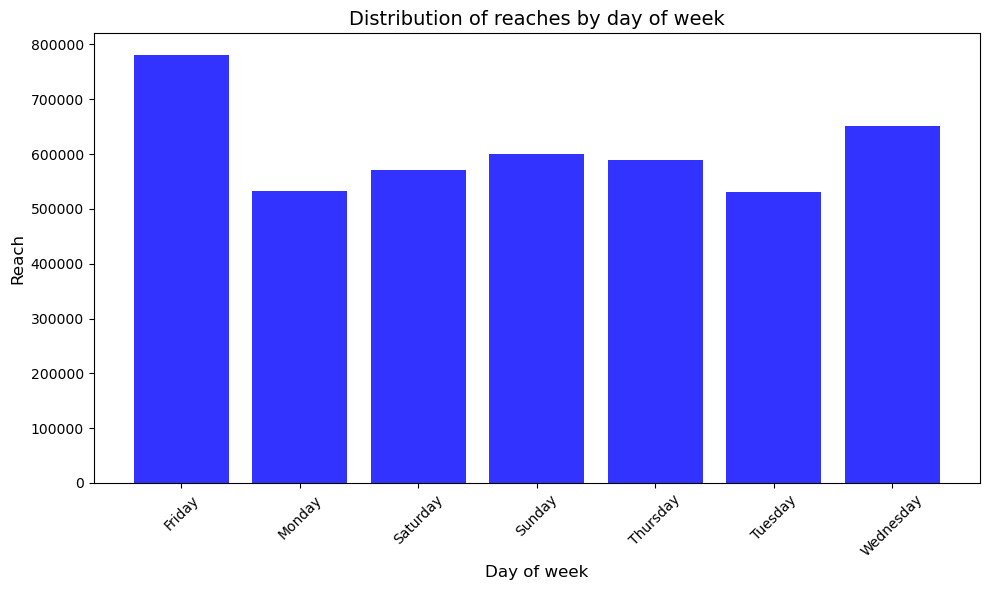

In [1576]:
daily_reaches = df.groupby('Day of week')['Reach'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daily_reaches.index, daily_reaches.values, color='blue', alpha=0.8)

plt.title('Distribution of reaches by day of week', fontsize=14)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Reach', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [1578]:
mean = daily_purchases.mean()
std_dev = daily_purchases.std()

z_score_list = []
for conversion in daily_purchases:
    z_score = (conversion - mean) / std_dev
    z_score_list.append(z_score)

z_score_series = pd.Series(z_score_list)

indexes = z_score_series[(z_score_series > 2) | (z_score_series < -2)].index
indexes

Index([], dtype='int64')

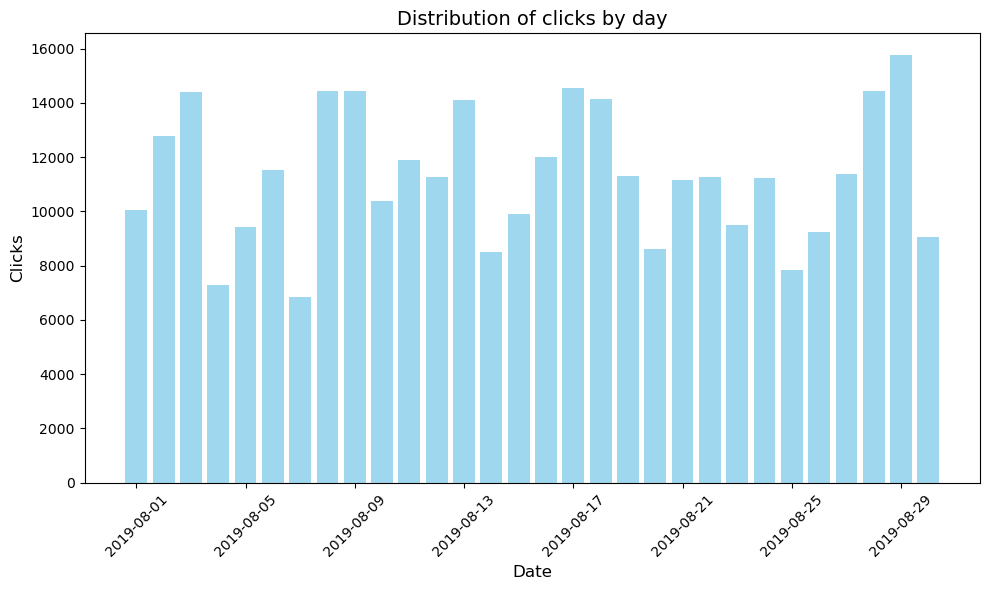

In [1580]:
daily_reaches = df.groupby('Date')['# of Website Clicks'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daily_reaches.index, daily_reaches.values, color='skyblue', alpha=0.8)

plt.title('Distribution of clicks by day', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Clicks', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [1582]:
mean = daily_purchases.mean()
std_dev = daily_purchases.std()

z_score_list = []
for conversion in daily_purchases:
    z_score = (conversion - mean) / std_dev
    z_score_list.append(z_score)

z_score_series = pd.Series(z_score_list)

indexes = z_score_series[(z_score_series > 2) | (z_score_series < -2)].index
indexes

Index([], dtype='int64')

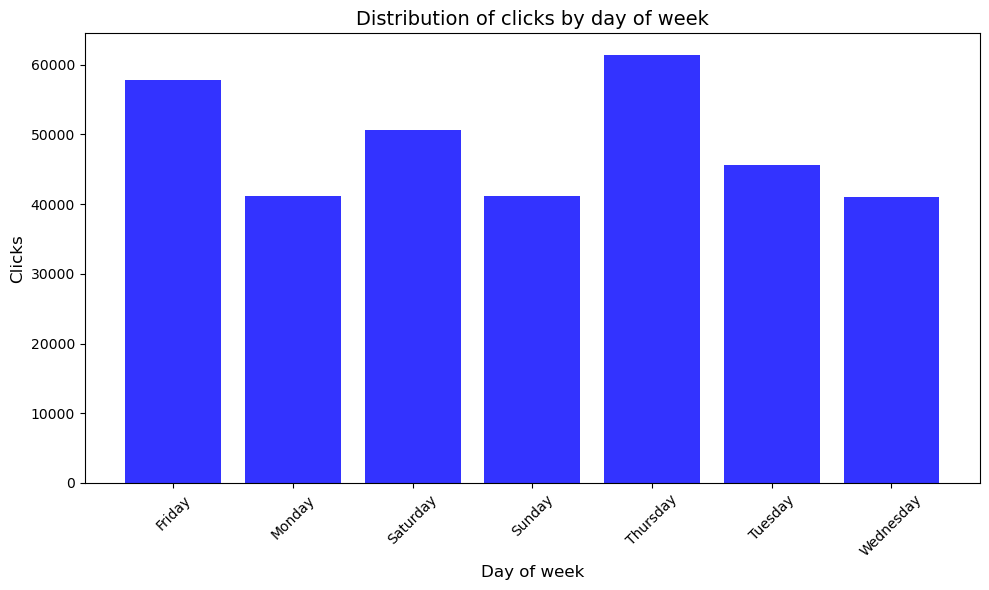

In [1584]:
daily_reaches = df.groupby('Day of week')['# of Website Clicks'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daily_reaches.index, daily_reaches.values, color='blue', alpha=0.8)

plt.title('Distribution of clicks by day of week', fontsize=14)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Clicks', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [1586]:
mean = daily_purchases.mean()
std_dev = daily_purchases.std()

z_score_list = []
for conversion in daily_purchases:
    z_score = (conversion - mean) / std_dev
    z_score_list.append(z_score)

z_score_series = pd.Series(z_score_list)

indexes = z_score_series[(z_score_series > 2) | (z_score_series < -2)].index
indexes

Index([], dtype='int64')

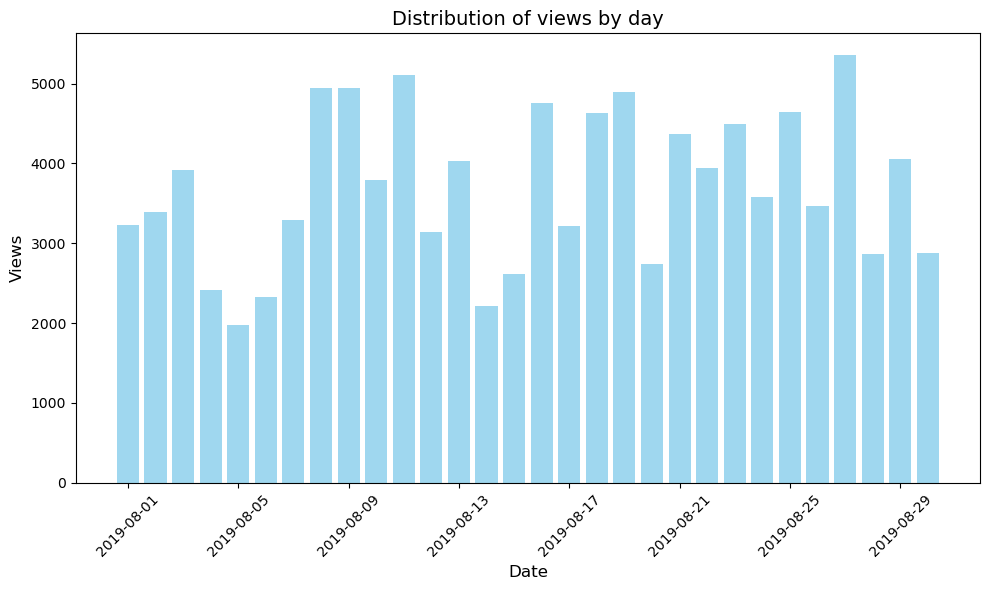

In [1588]:
daily_reaches = df.groupby('Date')['# of View Content'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daily_reaches.index, daily_reaches.values, color='skyblue', alpha=0.8)

plt.title('Distribution of views by day', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [1590]:
mean = daily_purchases.mean()
std_dev = daily_purchases.std()

z_score_list = []
for conversion in daily_purchases:
    z_score = (conversion - mean) / std_dev
    z_score_list.append(z_score)

z_score_series = pd.Series(z_score_list)

indexes = z_score_series[(z_score_series > 2) | (z_score_series < -2)].index
indexes

Index([], dtype='int64')

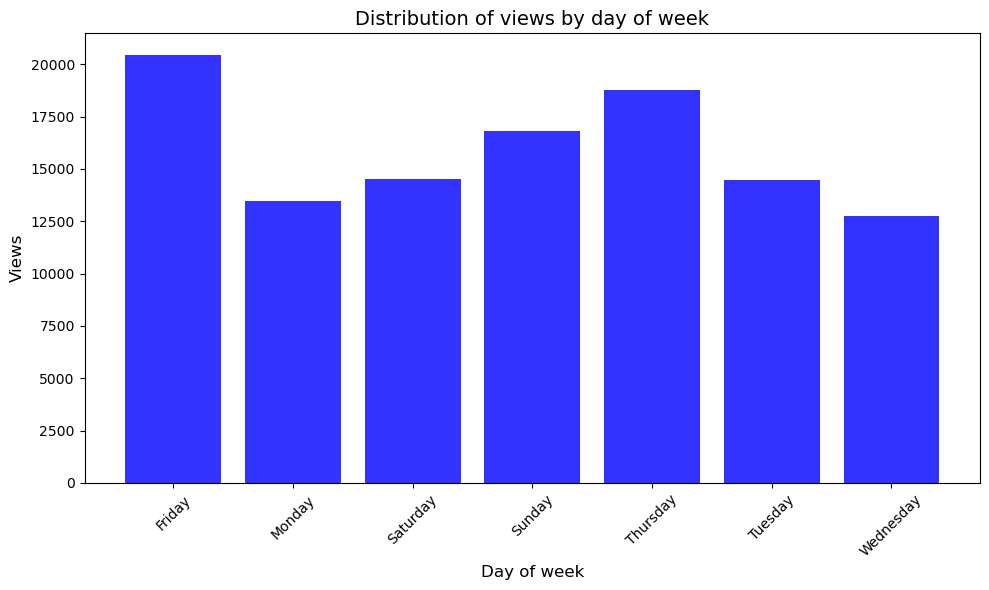

In [1592]:
daily_reaches = df.groupby('Day of week')['# of View Content'].sum()
plt.figure(figsize=(10, 6))
plt.bar(daily_reaches.index, daily_reaches.values, color='blue', alpha=0.8)

plt.title('Distribution of views by day of week', fontsize=14)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [1594]:
mean = daily_purchases.mean()
std_dev = daily_purchases.std()

z_score_list = []
for conversion in daily_purchases:
    z_score = (conversion - mean) / std_dev
    z_score_list.append(z_score)

z_score_series = pd.Series(z_score_list)

indexes = z_score_series[(z_score_series > 2) | (z_score_series < -2)].index
indexes

Index([], dtype='int64')

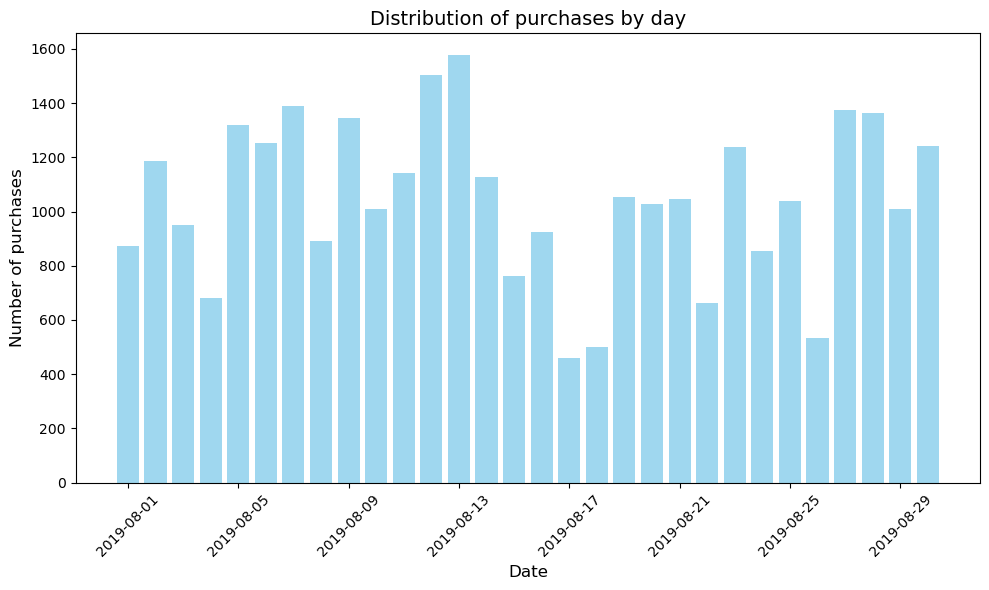

In [1596]:
daily_purchases = df.groupby('Date')['# of Purchase'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daily_purchases.index, daily_purchases.values, color='skyblue', alpha=0.8)

plt.title('Distribution of purchases by day', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of purchases', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [1598]:
mean = daily_purchases.mean()
std_dev = daily_purchases.std()

z_score_list = []
for conversion in daily_purchases:
    z_score = (conversion - mean) / std_dev
    z_score_list.append(z_score)

z_score_series = pd.Series(z_score_list)

indexes = z_score_series[(z_score_series > 2) | (z_score_series < -2)].index
indexes

Index([], dtype='int64')

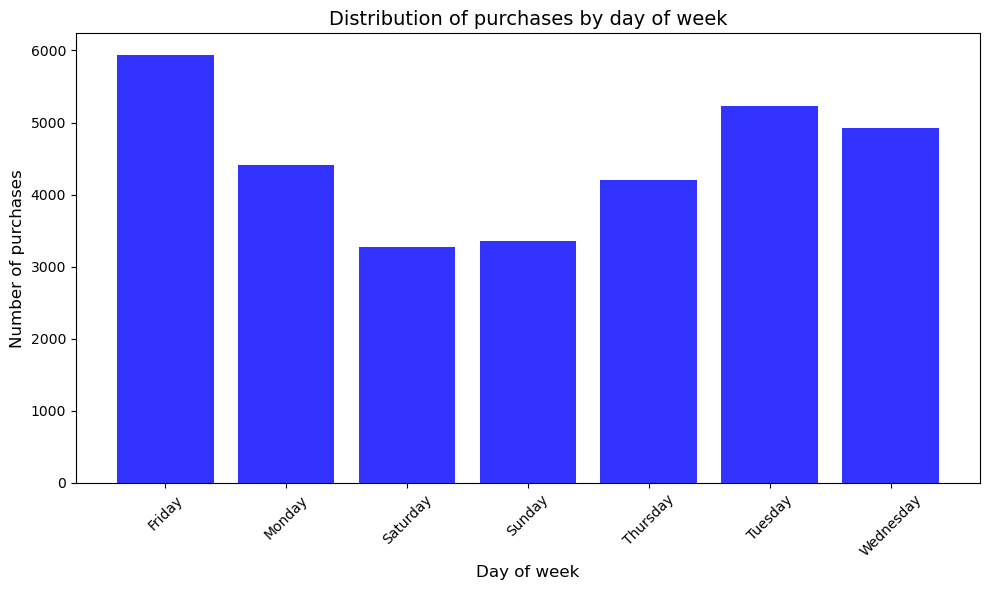

In [1602]:
daily_purchases = df.groupby('Day of week')['# of Purchase'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daily_purchases.index, daily_purchases.values, color='blue', alpha=0.8)

plt.title('Distribution of purchases by day of week', fontsize=14)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Number of purchases', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [1604]:
mean = daily_purchases.mean()
std_dev = daily_purchases.std()

z_score_list = []
for conversion in daily_purchases:
    z_score = (conversion - mean) / std_dev
    z_score_list.append(z_score)

z_score_series = pd.Series(z_score_list)

indexes = z_score_series[(z_score_series > 2) | (z_score_series < -2)].index
indexes

Index([], dtype='int64')

Thus, there are no anomalies in the data distribution over time.

<h2>Relationship Between Variables</h2>

In [1608]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.iloc[:, :-7]
correlation_matrix = numeric_df.corr()

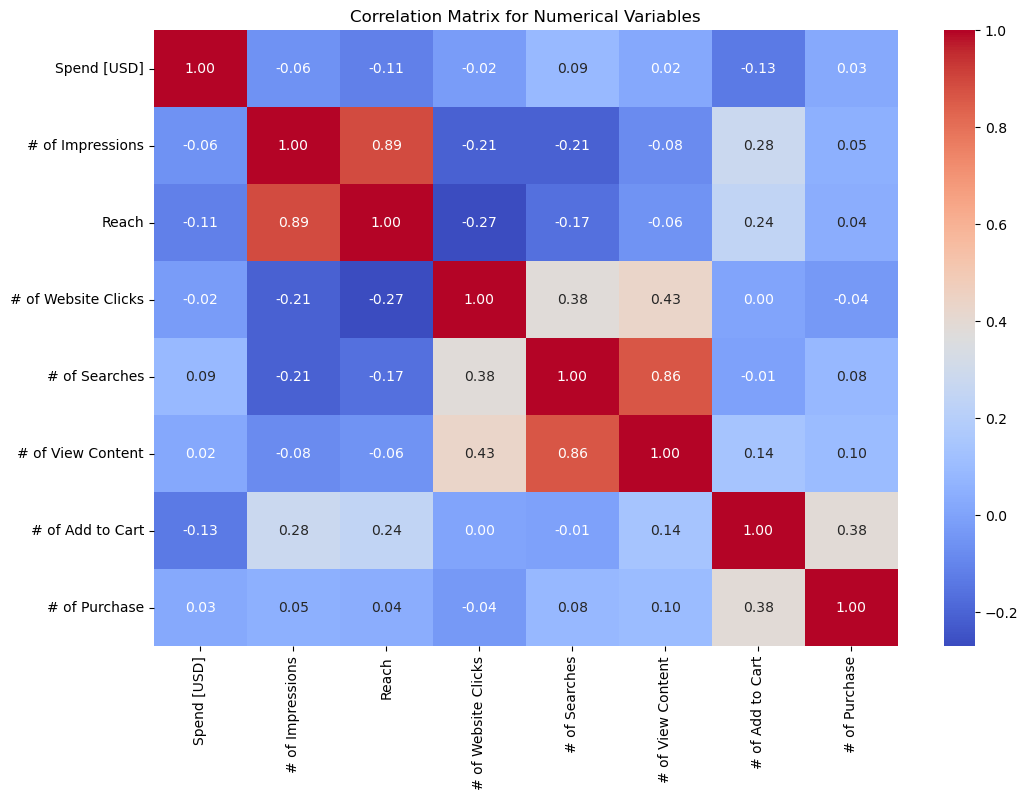

In [1610]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

<h4>Correlation Analysis:</h4>

Strong Positive Correlation:<br>
Ad Impressions ↔ Unique Ad Impressions (0.89): A very strong relationship. This is expected since unique impressions are a subset of all impressions.<br>
Product Searches ↔ Number of Product Views (0.86): A strong positive correlation. Users who search for products often view their details or listings.<br>
Moderate Positive Correlation:<br>
Add to Cart ↔ Purchases (0.38): A moderate relationship. Not all cart additions lead to purchases, indicating the need for an analysis of the cart stage (e.g., issues in the checkout process).<br>
Clicks ↔ Product Views (0.43): A moderate correlation. Users who click through to the site often proceed to interact with and view products.<br>
Clicks ↔ Product Searches (0.38): A moderate correlation, highlighting that not all users clicking on the site proceed to search for products.

<h2>Statistical Analysis</h2>

<h3>Using Mann-Whitney U Test </h3>

In [1618]:
control_campaign = df[df['Campaign Name'] == 'Control Campaign']['Conversion Rate From clicks(%)'].values
test_campaign = df[df['Campaign Name'] == 'Test Campaign']['Conversion Rate From clicks(%)'].values

stat, p = mannwhitneyu(control_campaign, test_campaign)
alpha = 0.05
p > alpha

True

<h3>Result</h3>
No statistically significant difference in conversion rates was found for different campaigns, as the p-value is higher than the chosen threshold for Type I error.

<h3>Calculate the Power</h3>

In [1624]:
mean_a = np.median(control_campaign)
mean_b = np.median(test_campaign)
std_a = control_campaign.std()
std_b = test_campaign.std()   
nobs1 = len(control_campaign)  
nobs2 = len(test_campaign) 
alpha = 0.05
power = 0.8  

pooled_std = np.sqrt(((std_a**2) + (std_b**2)) / 2)
effect_size = (mean_a - mean_b) / pooled_std           

power_analysis = TTestIndPower()
current_power = power_analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, ratio=nobs2/nobs1, alternative='two-sided')
print(f"Current Sample Power: {current_power:.2f}")
print(f"Effect size: {effect_size:.2f}")

Current Sample Power: 0.32
Effect size: 0.39


The power is very low, with a 68% probability that we will not detect statistically significant differences where they exist.

In [1627]:
sample_size = zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)
print(f"Required Sample Size: {sample_size:.0f} for one campaign")

Required Sample Size: 102 for one campaign


<h2>Solution</h2> Continue collecting data for 62 days and conclude the experiment thereafter.

<h2>Intermediate Results</h2>

<h3>Costs and Efficiency:</h3> Average and Median Costs:
The test campaign shows higher average (+275 USD) and median (+285 USD) costs.
The total cost overrun of the test campaign amounts to 76,892 - 68,653 = 8,249 USD.
Cost per purchase in the test campaign is higher: 4.92 compared to 4.37 for the control campaign, reducing its economic efficiency.
Purchases and Conversions:
The control campaign recorded 76 more purchases (15,713 versus 15,637).
Conversion rate is higher for the control campaign: 11.61% compared to 9.63% for the test campaign.
<h3>Advertising Metrics:</h3> Ad Impressions:
The control campaign significantly outperforms the test campaign in terms of ad impressions (108,940 versus 74,584). Unique Impressions:
The control campaign also leads with 88,370 compared to 53,491. Average Clicks:
The test campaign generates more website clicks: 6,032 versus 5,261, indicating higher ad interaction.
<h3>Conversions from Ad Impressions:</h3>
The control campaign's click rate is 5.06%, whereas the test campaign achieves 10.24%. This highlights the test campaign's strong ability to attract interest to the website.
<h3>Conversion Funnel:</h3> Transitions from Clicks:
Product searches from website clicks: the test campaign shows a slightly better result (43.74% versus 42.83%).
Product Views:
The control campaign demonstrates a higher percentage of product views (87.21% versus 75.65%).
Add to Cart:
The control campaign outperforms the test campaign—78.93% versus 51.51%.
Purchases from Cart Additions:
The test campaign performs significantly better here: 61.79% versus 46.06%.
<h3>Recommendations:</h3> Funnel Stage Optimization:
Investigate issues at the add-to-cart stage in the test campaign: users might face an inconvenient interface, unclear pricing, or a lack of promotions.
Maintain high conversion rates at the final stages (purchases from the cart) by enhancing incentives (e.g., discounts, free shipping).
Audience Quality:
Assess the audience of the test campaign: lower unique impressions and narrower reach may suggest less effective targeting.
Consider reallocating advertising budgets to broaden or fine-tune audience targeting.
Economic Efficiency:
Compare the Customer Acquisition Cost (CAC) with the potential Lifetime Value (LTV) for both campaigns to evaluate long-term benefits.
Conduct A/B testing of different creatives or offers to reduce the cost per purchase in the test campaign.
Continuation of Data Collection:
Increase the data volume to achieve statistically significant results, especially for metrics with small differences.
Ad Analysis:
Evaluate the effectiveness of the test campaign creatives, as the high click rate indicates their appeal. They might be adapted to improve the control campaign results.
<h3>Brief Conclusion:</h3> The test campaign shows strong activity at the early stages of the funnel (higher click rate), but it encounters challenges in the later stages, particularly at the add-to-cart stage, where conversions are significantly lower compared to the control campaign. Despite a higher number of clicks, the cost per purchase is higher, and overall profitability is lower. The control campaign is more stable, with better overall efficiency, higher conversion rates, and well-managed expenses.
It is recommended to focus on optimizing the add-to-cart stage, improving targeting in the test campaign, and continuing data collection to enhance statistical significance. This will support making well-informed decisions.